<a href="https://colab.research.google.com/github/AndreaQHostos/ProyectoFinal_DataScience/blob/main/ProyectoFinal_Quero_Aguilar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Impago de Tarjetas de Crédito**










##**Resumen/Abstracto**  
Se dispone de un archivo que contiene información sobre factores demográficos, datos crediticios, historial de pago, estados de cuenta y si han caído o no en impago (default) clientes con tarjeta de crédito en Taiwan de Abril 2005 a Septiembre del 2005.  Con este archivo se desea encontrar patrones en las personas / estados de cuenta que caen en impago

## **1. Definición de objetivo**

Se desea encontrar el perfil de los usuarios de tarjetas de crédito que tienen más probabilidades de caer en impago (default). Así mismo, se busca encontrar un patrón o tendencia que sugiera que un usuario está próximo a caer en impago.




## **2. Contexto comercial**

La banca extiende tarjetas de crédito a un gran número de personas.  Al cobrarles intereses y comisiones anuales generan sus ganancias.  Sin embargo, si extendieran esas tarjetas a una gran cantidad de personas que no pudieran pagar las deudas adquiridas, entonces el banco podría enfrentar serios problemas de liquidez y gastos inesperados para tratar de recuperar su dinero.




## **3. Problema comercial**

El banco está interesado en:

1. Encontrar los perfiles de las personas que más tienden a caer en impago, con la finalidad de ser más rigurosos con estos al momento de aprobar tarjetas.

2. Detectar los patrones/tendencias en las cuentas de las personas que sugieran que caerán en impago en un futuro cercano con la finalidad de tomar medidas previsorias antes de que esto ocurra.



## **4. Contexto analítico**

El banco dispone de registros que contienen información sobre factores demográficos, datos crediticios, historial de pago, estados de cuenta y si han caído o no en impago (default) sus clientes con tarjeta de crédito en Taiwan de Abril 2005 a Septiembre del 2005.

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
!pip install squarify
import squarify # pip install squarify (algorithm for treemap)
!pip install circlify
import circlify
import numpy as np


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
#import pandas as pd
sheet_url = 'https://docs.google.com/spreadsheets/d/1EGZS8bpDa2ZoR9SlgY3UJE_G76X7a0CM9PqhD3tDKnI/export?format=csv&gid=69300441'
df_tarjetas = pd.read_csv(sheet_url)
df_tarjetas.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df_tarjetas.shape

(30000, 25)

El archivo contiene 30,000 filas y 25 columnas

In [ ]:
df_tarjetas.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

# Para entender mejor cada columna/variable, el archivo fue proporcionado con la siguiente información respecto a las mismas:

*   ID: Identificador de cada cliente
*   LIMIT_BAL:  Cantidad de crédito otorgado en Nuevo Dolar Taiwanés (incluye tarjeta individual y adicionales)
*   SEX: Género (1=masculino, 2=femenino)
*   EDUCATION: Nivel de estudios (1=estudios de posgrado, 2=universidad, 3=preparatoria, 4=otros, 5=desconocido, 6=desconocido)
*   MARRIAGE: Estado civil (1=casado, 2=soltero, 3=otros)
*   AGE: Edad en años
*   PAY_0: Estado de pago en Septiembre del 2005 (-1=pago en tiempo y forma, 1=pago retrasado por un mes, 2=pago retrasado por dos meses, ... 8=pago retrasado por ocho meses, 9=pago retrasado por nueve meses o más)
*   PAY_2: Estado de pago en Agosto del 2005 (misma escla que la descrita para PAY_0)
*   PAY_3: Estado de pago en Julio del 2005 (misma escla que la descrita para PAY_0)
*   PAY_4: Estado de pago en Junio del 2005 (misma escla que la descrita para PAY_0)
*   PAY_5: Estado de pago en Mayo del 2005 (misma escla que la descrita para PAY_0)
*   PAY_6: Estado de pago en Abril del 2005 (misma escla que la descrita para PAY_0)
*   BILL_AMT1: Saldo del Estado de Cuenta en Septiembre del 2005 (en Nuevo Dolar Taiwanés)
*   BILL_AMT2: Saldo del Estado de Cuenta en Agosto del 2005 (en Nuevo Dolar Taiwanés)
*   BILL_AMT3: Saldo del Estado de Cuenta en Julio del 2005 (en Nuevo Dolar Taiwanés)
*   BILL_AMT4: Saldo del Estado de Cuenta en Junio del 2005 (en Nuevo 
*   BILL_AMT5: Saldo del Estado de Cuenta en Mayo del 2005 (en Nuevo Dolar Taiwanés)
*   BILL_AMT6: Saldo del Estado de Cuenta en Abril del 2005 (en Nuevo Dolar Taiwanés)
*   PAY_AMT1: Cantidad del pago previo en Septiembre del 2005 (Nuevo Dolar Taiwanés)
*   PAY_AMT2: Cantidad del pago previo en Agosto del 2005 (Nuevo Dolar Taiwanés)
*   PAY_AMT3: Cantidad del pago previo en Julio del 2005 (Nuevo Dolar Taiwanés)
*   PAY_AMT4: Cantidad del pago previo en Junio del 2005 (Nuevo Dolar Taiwanés)
*   PAY_AMT5: Cantidad del pago previo en Mayo del 2005 (Nuevo Dolar Taiwanés)
*   PAY_AMT6: Cantidad del pago previo en Abril del 2005 (Nuevo Dolar Taiwanés)
*	default.payment.next.month: Impago en el siguiente mes (1=si, 0=no)


Las **variables potencialmente interesantes** para este estudio son los factores demográficos (Género, Nivel de Estudios, Estado Civil y Edad) así como los saldos, pagos y límite de crédito otorgado

## **5. Análisis exploratorio de datos**


### **5.1 Variables demográficas**

### **Hipótesis**

Las hipótesis iniciales que se tienen para tratar de identificar los patrones buscados son: 

I. Las mujeres tienden a caer más en impago

II. Las personas con un menor nivel de estudios tienden a caer más en impagos

III. Las personas casadas tienden a caer más en impago

IV. Las personas jóvenes tienden a caer más en impago

A continuación se abordará cada una de éstas para confirmar o rechazar las mismas

### **5.1.1  ¿Las mujeres tienden a caer más en impago?**

Hay quienes dicen que las mujeres son más pagadoras que los hombres.  Del mismo modo, hay quienes piensan que las mujeres son más gastalonas que los hombres.  Típicamente una persona más gastalona tendería a caer más en impago, ¿no? La realidad es que estos son puros prejuicios.  En esta sección analizaremos, con argumentos científicos, si, para el caso del banco en estudio (ojo, no podemos generalizar), efectivamente las mujeres tienden a caer más en impago que los hombres.

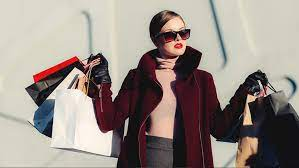

Primero, por cuestiones de claridad visualizaremos nuevamente el dataset a analizar:

In [ ]:
df_tarjetas

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


Ahora se procede a revisar si las clasificaciones referentes al género fueron llenadas apropiadamente.

In [ ]:
df_tarjetas.SEX.value_counts() 

2    18112
1    11888
Name: SEX, dtype: int64

Se observa que los registros están bien clasificados de acuerdo a lo esperado, es decir, sólo está la categoría 1 (Hombre) y la categoría 2 (Mujer).

Una vez que se ha revisado que el dataset está listo para realizar este análisis, se empieza por filtrar los registros de las personas que cayeron en impago.

In [ ]:
#Filtramos los registros que cayeron en impago, para analizarlos
df_tarjetas_impagos = df_tarjetas[df_tarjetas['default.payment.next.month'] > 0] 
df_tarjetas_impagos

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,14,70000.0,1,2,2,30,1,2,2,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,17,20000.0,1,1,2,24,0,0,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
21,22,120000.0,2,2,1,39,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000.0,1,2,1,34,3,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29994,29995,80000.0,1,2,2,34,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


De estas, nos interesa conocer cuántos son hombres y cuántas mujeres 

In [ ]:
# De los que cayeron en impago, contamos la cantidad de hombres
Hombres=df_tarjetas_impagos[df_tarjetas_impagos['SEX']==1]
Cantidad_Hombres = len(Hombres)
Cantidad_Hombres

2873

In [ ]:
# De los que cayeron en impago, contamos la cantidad de mujeres
Mujeres=df_tarjetas_impagos[df_tarjetas_impagos['SEX']==2]
Cantidad_Mujeres = len(Mujeres)
Cantidad_Mujeres

3763

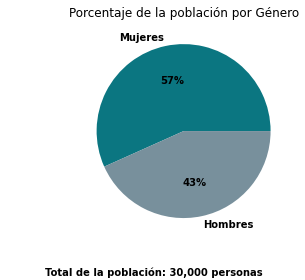

In [ ]:
data = [Cantidad_Mujeres, Cantidad_Hombres]
labels = ['Mujeres', 'Hombres']
colors =['#0b7681',"#78909cff", '#88b8cfff']
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.title ("Porcentaje de la población por Género")
plt.annotate('Total de la población: 30,000 personas',xy=(45, 5), xycoords='figure points')
plt.show()

Se observa que 3,763 personas fueron del sexo Femenino, mientras que sólo 2,873 fueron del sexo Masculino.  Entonces, podemos concluir que efectivamente las mujeres caen más en impago, ¿correcto?  NOOOO! Si no se es cuidadoso, se podría inferir de estos dos últimos resultados que es más factible que una mujer caiga en impago que un hombre. Sin embargo, para poder confirmar esto, es necesario obtener las probabilidades.  Para esto, necesitamos conocer la cantidad total de hombres y de mujeres que contiene el data set. 

In [ ]:
#Calculamos la cantidad de Hombres que hay en el archivo
HombresTotal=df_tarjetas[df_tarjetas['SEX']==1]
Cantidad_HombresTotal =len(HombresTotal)
Cantidad_HombresTotal

11888

In [ ]:
#Calculamos la cantidad de Mujeres que hay en el archivo
MujeresTotal=df_tarjetas[df_tarjetas['SEX']==2]
Cantidad_MujeresTotal =len(MujeresTotal)
Cantidad_MujeresTotal

18112

In [ ]:
#Proporción de Mujeres a Hombres que hay en el archivo
Cantidad_MujeresTotal/Cantidad_HombresTotal

1.5235531628532974

Cabe resaltar que el dataset contine 18,112 registros de mujeres y 11,888 registros de hombres, por lo que el dataset está desbalanceado, ya que tiene un poco más del 50% de registros de mujeres que de hombres.  

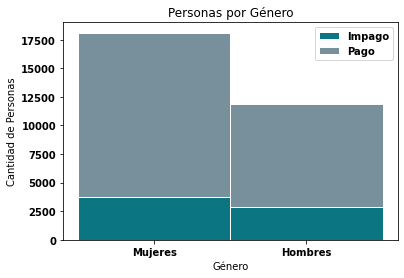

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [Cantidad_Mujeres, Cantidad_Hombres]
bars2 = [Cantidad_MujeresTotal-Cantidad_Mujeres, Cantidad_HombresTotal-Cantidad_Hombres]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1]
 
# Names of group and bar width
names = ['Mujeres','Hombres']
Clasificacion = ['Impago', 'Pago']
barWidth = 1
 
# Create blue bars
plt.bar(r, bars1, color='#0b7681', edgecolor='white', width=barWidth)
# Create gray bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#78909cff', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Género")
plt.ylabel("Cantidad de Personas")
plt.title("Personas por Género")
plt.legend(Clasificacion, loc=1)
 
# Show graphic
plt.show()

Al tener más registros de mujeres que de hombres, es de esperarse que se encuentren más mujeres en impago que hombres, pero esto no quiere decir que es más probable que una mujer caiga en impago que un hombre. Por lo tanto, procederemos a calcular dicha probabilidad.

In [ ]:
#Calculamos la probabilidad de que un usuario caiga en impago
ProbabilidadImpago= len(df_tarjetas_impagos)/len(df_tarjetas)*100
ProbabilidadImpago

22.12

In [ ]:
#Calculamos la probabilidad de que los hombres caigan en impago
ProbabilidadHombresImpago= (Cantidad_Hombres/Cantidad_HombresTotal)*100
ProbabilidadHombresImpago

24.16722745625841

In [ ]:
#Calculamos la probabilidad de que las mujeres caigan en impago
ProbabilidadMujeresImpago= (Cantidad_Mujeres/Cantidad_MujeresTotal)*100
ProbabilidadMujeresImpago

20.776280918727917

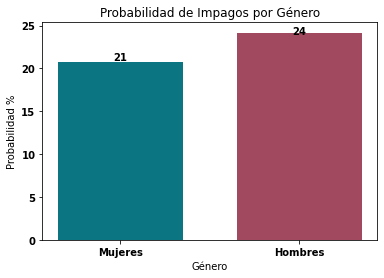

In [ ]:
#Graficamos los resultados obtenidos
fig, ax=plt.subplots()
x=["Mujeres", "Hombres"]
y=[ProbabilidadMujeresImpago, ProbabilidadHombresImpago]
#colors_bar= ['#b2e2f2', '#fabfb7', "#ffda9e", '#b0f2c2']
#
colors_bar= ['#0b7681', '#a14a5f', "#78909cff", '#88b8cfff']
ax.bar(x, y, color= colors_bar, width=0.7)
ax.set_title('Probabilidad de Impagos por Género')
ax.set_ylabel('Probabilidad %')
ax.set_xlabel('Género')
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

y_rounded = [round(ProbabilidadMujeresImpago),round(ProbabilidadHombresImpago),]
addlabels(x,y_rounded)
 
plt.show()

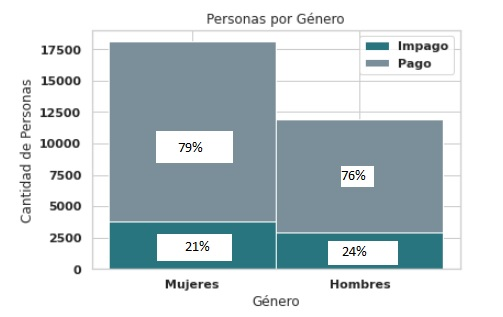

Se encuentra que la probabilidad de que un hombre caiga en impago es del 24.16% mientras que la probabilidad de que una mujer lo haga es del 20.77%.  Estos valores se representan de manera visual en la gráfica de arriba.

Con esto, es posible confirmar la hipótesis alterna: **Los hombres tienden a caer más en impago que las mujeres.**

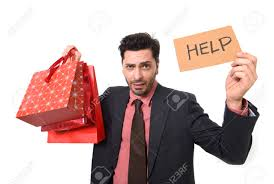

### **5.1.2 ¿Las personas con un menor nivel de estudios tienden a caer más en impagos?**

Es muy escuchado eso de que se necesita tener educación financiera para diversos temas como:

*   Tener unas finanzas personales sanas
*   Saber comparar diferentes opciones de crédito y seleccionar la más conveniente
*   Hacer un buen uso de las tarjetas de crédito

Un mayor nivel de estudios no necesariamente implica una mejor educación financiera. Sin embargo, sí es de esperarse que a un mayor nivel de estudio, la persona tenga más herramientas para familiarizarse o entender mejor ciertos tópicos financieros ¿cierto?  Pues para fundamentar esta expectativa, procederemos a analizar los datos. 

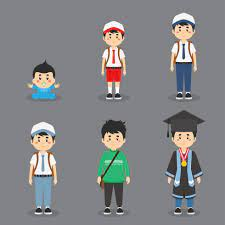

Empezamos visualizando qué tenemos en la columna correspondiente al nivel de estudios:

In [ ]:
df_tarjetas.EDUCATION.value_counts() 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

De acuerdo a la información recibida junto con el archivo, no se espera una clasificación 0, sino del 1 al 6.  Y de hecho, la clasificación 4 (otros), 5 (desconocida) y 6 (desconocida) prácticamente tienen el mismo significado para este análisis:  otros o desconocida

Por lo tanto se procede a cambiar el valor de 0, 5 y 6 a 4 (otros)

In [ ]:
fil = (df_tarjetas.EDUCATION == 5) | (df_tarjetas.EDUCATION == 6) | (df_tarjetas.EDUCATION == 0)
fil

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: EDUCATION, Length: 30000, dtype: bool

In [ ]:
df_tarjetas.loc[fil, 'EDUCATION'] = 4
df_tarjetas.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Ahora sí, el dataset está listo para tratar de resolver la cuestión planteada.

In [ ]:
Matriz=df_tarjetas.EDUCATION.value_counts()
Matriz[1]

10585

In [ ]:
Matriz[2]

14030

Veamos gráficamente, cómo está distribuida la población del dataset 

*   Elemento de lista

*   Elemento de lista
*   Elemento de lista


*   Elemento de lista

con respecto al nivel de estudios:

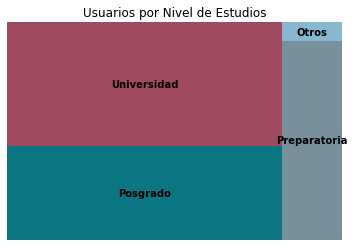

In [ ]:
data = [Matriz[1],Matriz[2],Matriz[3],Matriz[4]]
labels = ["Posgrado", "Universidad", "Preparatoria", "Otros"]
colors=['#0b7681', '#a14a5f', "#78909cff", '#88b8cfff']
plt.axis('off')
axis = squarify.plot(sizes=data, label=labels, color=colors)
axis.set_title('Usuarios por Nivel de Estudios')
plt.show()

Se observa que la mayoría de los usuarios tienen estudios universitarios, seguidos por los que tienen estudios de posgrado, los que tienen preparatoria y otros

Evaluaremos la probabilidad de caer en impago que tiene cada categoría del nivel de estudios.  Para esto, en el nuevo dataset modificado, filtramos los usuarios que cayeron en impago:

In [ ]:
#Filtramos los registros que cayeron en impago, para analizarlos
df_tarjetas_impagos = df_tarjetas[df_tarjetas['default.payment.next.month'] > 0] 
df_tarjetas_impagos
df_tarjetas_impagos.EDUCATION.value_counts()

2    3330
1    2036
3    1237
4      33
Name: EDUCATION, dtype: int64

Puede observarse que en el nuevo dataset ya no se encuentran las categorías 0, 5 y 6 ya que éstas fueron reemplazadas anteriormente

In [ ]:
MatrizImpago=df_tarjetas_impagos.EDUCATION.value_counts()
MatrizImpago[1]



2036

In [ ]:
#Probabilidad de que caigan en impago los usuarios con estudios de posgrado

ProbPosgrado = MatrizImpago[1]/Matriz[1]*100
ProbPosgrado

19.23476617855456

In [ ]:
#Probabilidad de que caigan en impago los usuarios con estudios universitarios

ProbUniv = MatrizImpago[2]/Matriz[2]*100
ProbUniv

23.734853884533145

In [ ]:
#Probabilidad de que caigan en impago los usuarios con estudios de preparatoria

ProbPrepa = MatrizImpago[3]/Matriz[3]*100
ProbPrepa

25.15761643278422

In [ ]:
#Probabilidad de que caigan en impago los usuarios con otros estudios

ProbOtros = MatrizImpago[4]/Matriz[4]*100
ProbOtros

7.051282051282051

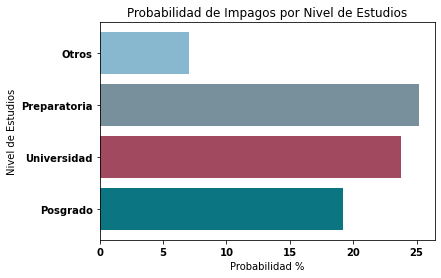

In [ ]:
#Graficamos los resultados obtenidos
fig, ax=plt.subplots()
x=["Posgrado", "Universidad", "Preparatoria", "Otros"]
y=[ProbPosgrado, ProbUniv, ProbPrepa, ProbOtros]
colors_bar= ['#0b7681', '#a14a5f', "#78909cff", '#88b8cfff']
ax.barh(x, y, color= colors_bar)
ax.set_title('Probabilidad de Impagos por Nivel de Estudios')
ax.set_ylabel('Nivel de Estudios')
ax.set_xlabel('Probabilidad %')
plt.show()

Como recordará el lector, en la categoría *Otros* se incluyeron dos categorias nombradas *desconocido* y una sin categorizar. Estos pudieran considerarse como los outliers del dataset y al no aportar mucha información sobre la cuestión en estudio, se considera válido el descartarlos

Al descartar la categoría Otros, con el gráfico anterior se puede concluir que **a menor nivel de estudios, mayor la propabilidad de caer en impago**.

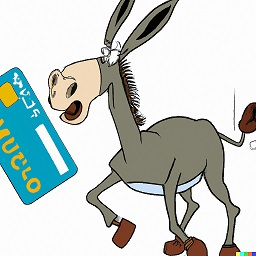

### **5.1.3 ¿Las personas casadas tienden a caer más en impago?**

Después de que me casé, efectivamente mis gastos aumentaron.  Entonces, yo podría decir que efectivamente una persona casada tiende a caer más en impago.  

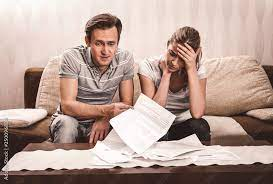

Pero, ¿quién soy yo para poder hacer tal afirmación? ¿Con base en qué la hago? ¿Con base en mi experiencia? Si fuera un experto en estadística, a lo mejor este argumento tendría algo de peso, pero aquí hago referencia a mi experiencia como persona casada, y nada más... Esta experiencia no es suficiente, por lo tanto, necesitamos de los datos para validar / refutar dicha afirmación.

Antes de entrar en materia, revisaremos si las clasificaciones referentes al Estado Civil fueron llenadas apropiadamente

In [ ]:
df_tarjetas.MARRIAGE.value_counts() 

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

La categoría 0 no se encuentra definida, por lo que se procederá a considerarla como categoría 3 (*Otro*)

In [ ]:
fil = df_tarjetas.MARRIAGE == 0
df_tarjetas.loc[fil, 'MARRIAGE'] = 3
MatrizM=df_tarjetas.MARRIAGE.value_counts()
MatrizM

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

A continuación representaremos cómo está conformada la población con respecto a su estado civil

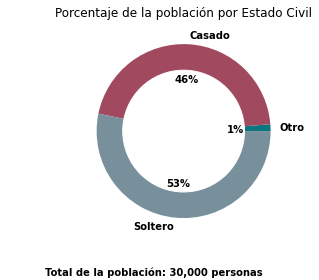

In [ ]:
data = [MatrizM[3],MatrizM[1],MatrizM[2]]
labels = ['Otro','Casado','Soltero']
#colors =['#0b7681',"#78909cff", '#88b8cfff']
colors= ['#0b7681', '#a14a5f', '#78909cff']
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.title ("Porcentaje de la población por Estado Civil")
plt.annotate('Total de la población: 30,000 personas',xy=(45, 5), xycoords='figure points')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

En el nuevo dataset modificado, filtramos los usuarios que cayeron en impago

In [ ]:
#Filtramos los registros que cayeron en impago, para analizarlos
df_tarjetas_impagos = df_tarjetas[df_tarjetas['default.payment.next.month'] > 0] 
df_tarjetas_impagos
MatrizM_Impago=df_tarjetas_impagos.MARRIAGE.value_counts()
MatrizM_Impago

2    3341
1    3206
3      89
Name: MARRIAGE, dtype: int64

Ahora procederemos a obtener la probabilidad de impago de cada categoría de estado civil.

In [ ]:
#Probabilidad de que caigan en impago los usuarios casados

ProbCasado = MatrizM_Impago[1]/MatrizM[1]*100
ProbCasado

23.471703638626547

In [ ]:
#Probabilidad de que caigan en impago los usuarios solteros

ProbSoltero = MatrizM_Impago[2]/MatrizM[2]*100
ProbSoltero

20.928338762214985

In [ ]:
#Probabilidad de que caigan en impago los usuarios con Estado Civil "Otro"

ProbECOtro = MatrizM_Impago[3]/MatrizM[3]*100
ProbECOtro

23.607427055702917

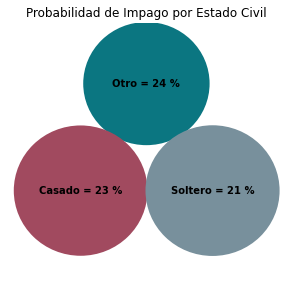

In [ ]:
y = [ProbECOtro,ProbCasado,ProbSoltero]
ProbECOtroR = round(ProbECOtro)
ProbCasadoR = round(ProbCasado)
ProbSolteroR = round(ProbSoltero)

# compute circle positions:
circles = circlify.circlify(
    y, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(5,5))

# Title
ax.set_title('Probabilidad de Impago por Estado Civil')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = ['Otro = ' + str(ProbECOtroR) + ' %',
          'Casado = ' + str(ProbCasadoR) + ' %',
          'Soltero = ' + str(ProbSolteroR) + ' %']

colors_circle= ['#0b7681', '#a14a5f', '#78909cff']

i=0

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    #ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2,color=colors_circle[i]))
    ax.add_patch(plt.Circle((x, y), r, linewidth=2,color=colors_circle[i]))
    i = i+1
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )

En la gráfica se observa que tienen prácticamente el mismo nivel de probabilidad de caer en impago las personas casadas o con un estado civil en la categoría *Otro*.  Por lo tanto se rechaza la Hipótesis en cuestión, pero se concluye que **las personas solteras tienen un poco menos probabilidades de caer en impago**

###**5.1.4 ¿Las personas jóvenes tienden a caer más en impago?**

Se podría pensar que una persona joven, en general, gana menos que una persona de mayor edad y, también, que su nivel de inmadurez lo haría una persona más propensa a gastar de más, y, por lo tanto, caer en impago. Veremos si los datos respaldan esta hipótesis.

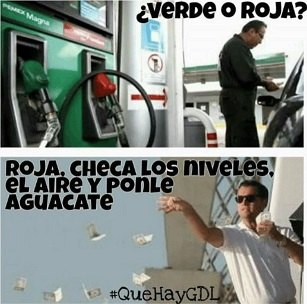

Primero se revisará el rango de edades proporcionadas por el dataset:

In [ ]:
df_tarjetas.AGE.describe() 

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Se observa que va de 21 a 79 años, lo cual es razonable para la edad de los humanos.  

Procedemos a visualizarlos por rangos:

Text(0.5, 1.0, 'Cantidad de Usuarios por Edad')

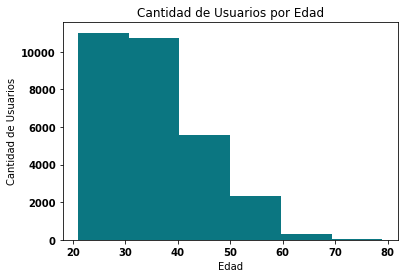

In [ ]:
fig, ax=plt.subplots()
#df_tarjetas.AGE.hist()
n,bins,patches = plt.hist(df_tarjetas.AGE,bins=6, color= '#0b7681' )
ax.set_ylabel("Cantidad de Usuarios")
ax.set_xlabel("Edad")
ax.set_title("Cantidad de Usuarios por Edad")



Ahora, también por rangos, visualizaremos la cantidad de los mismos que cayó en impago.

In [ ]:
bins

array([21.        , 30.66666667, 40.33333333, 50.        , 59.66666667,
       69.33333333, 79.        ])

In [ ]:
n

array([11013., 10713.,  5594.,  2341.,   314.,    25.])

Text(0.5, 1.0, 'Cantidad de Usuarios en Impago por Edad')

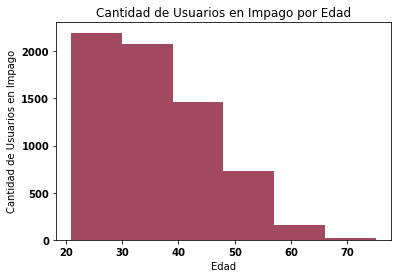

In [ ]:
fig, ax=plt.subplots()
#df_tarjetas_impagos.AGE.hist()
n_impago,bins_impago,patches = plt.hist(df_tarjetas_impagos.AGE,bins=6, color= '#a14a5f')
ax.set_ylabel("Cantidad de Usuarios en Impago")
ax.set_xlabel("Edad")
ax.set_title("Cantidad de Usuarios en Impago por Edad")

Procederemos a calcular la probabilidad de impago.

In [ ]:
bins_impago

array([21., 30., 39., 48., 57., 66., 75.])

In [ ]:
n_impago

array([2197., 2077., 1461.,  726.,  152.,   23.])

In [ ]:
ProbImpago = n_impago/n*100
ProbImpago

array([19.949151  , 19.38765985, 26.1172685 , 31.01238787, 48.40764331,
       92.        ])

In [ ]:
bins_impago_prom = [0 for i in range(0,len(n_impago))]
bins_impago_prom

[0, 0, 0, 0, 0, 0]

In [ ]:
for i in range(0,len(n_impago)): 
  bins_impago_prom[i] = (bins_impago[i]+bins_impago[i+1])/2

bins_impago_prom

[25.5, 34.5, 43.5, 52.5, 61.5, 70.5]

Text(0.5, 1.0, 'Probabilidad de Impago por Edad')

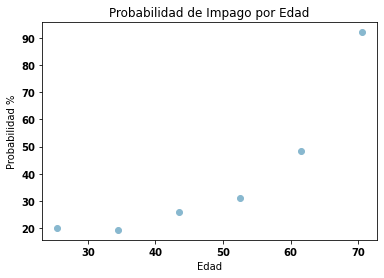

In [ ]:
fig, ax=plt.subplots() 
plt.scatter(bins_impago_prom, ProbImpago,  color= "#88b8cfff")
ax.set_ylabel("Probabilidad %")
ax.set_xlabel("Edad")
ax.set_title("Probabilidad de Impago por Edad")

En la gráfica es posible observar que **la probabilidad de caer en impago tiende a aumentar de manera exponencial conforme el usuario tiene una mayor edad**.  Por lo tanto se rechaza la Hipótesis en cuestión.



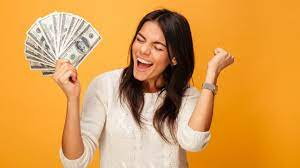

### **Conclusiones de las variables demográficas**

En este punto termina el análisis de las variables demográficas.  Resumiendo, las conclusiones encontradas se listan a continuación:

Las probabilidades de caer impago aumentan

1. Cuando el género del usuario es masculino
2. Conforme el usuario tiene un menor nivel de estudios
3. Cuando el usuario no es soltero
4. Exponencialmente conforme aumenta la edad del usuario

Por lo tanto, se recomienda al banco poner atención especial en el proceso de aprobación de tarjetas de crédito para personas del sexo masculino, con un nivel de estudio bajo, no solteras y de edad avanzada, ya que éstas tienen una probabilidad de caer en impago del 24%











In [ ]:
H=df_tarjetas[df_tarjetas['SEX']==1] #DF de puros hombres
HEb = H[H.EDUCATION == 3] #DF hombres con estudios bajos (preaparatoria)
HEbNs = HEb[HEb.MARRIAGE != 1] #DF hombres con estudios bajos, no solteros.
HEbNsEa = HEbNs[HEbNs.AGE > 41] #DF hombres con estudios bajos, no solteros y edad avanzada (el 75% de la población del DF es menor a 41 años)
Qty_HEbNsEa = len(HEbNsEa)
Qty_HEbNsEaImpago = len(HEbNsEa[HEbNsEa['default.payment.next.month'] == 1]) #Cantidad de hombres con estudio bajos, no solteros y edad avanzada que cayo en impago
Prob_HEbNsEaImpago = Qty_HEbNsEaImpago/Qty_HEbNsEa*100
Prob_HEbNsEaImpago

24.27536231884058

y en los registros proporcionados representan un 0.9% de su población.

In [ ]:
Porc_HEbNsEa=Qty_HEbNsEa/len(df_tarjetas)*100
Porc_HEbNsEa

0.9199999999999999

### **5.2 Variables históricas y financieras**

### **Hipótesis**

V.  Las personas cuyo saldo está más próximo a su límite de crédito tienden a caer más en impago

VI. Las personas que se han retrasado más en sus pagos tienden a caer más en impago

A continuación se abordará cada una de éstas para confirmar o rechazar las mismas


###**5.2.1 ¿Las personas cuya deuda está más próxima a su límite de crédito tienden a caer más en impago?**

Se presume que cuando una persona tiene la deuda más próxima a su límite de crédito es porque no ha podido saldar el total de la misma y ésta ha ido y seguirá creciendo hasta que finalmente la persona caiga en impago.

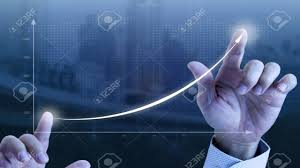

¿Será esto realmente lo que pasa?  Veremos qué dicen los datos...

Primero se analiza el comportamiento de la población en general respecto al estado de cuenta y los pagos realizados a través de la mediana de estos.

In [ ]:
#Mediana del estado de cuenta de la población en los diferentes meses
BILL_AMT1_median = df_tarjetas.BILL_AMT1.median()
BILL_AMT2_median = df_tarjetas.BILL_AMT2.median()
BILL_AMT3_median = df_tarjetas.BILL_AMT3.median()
BILL_AMT4_median = df_tarjetas.BILL_AMT4.median()
BILL_AMT5_median = df_tarjetas.BILL_AMT5.median()
BILL_AMT6_median = df_tarjetas.BILL_AMT6.median()

In [ ]:
Bill_Median = [BILL_AMT6_median,BILL_AMT5_median,BILL_AMT4_median,BILL_AMT3_median,BILL_AMT2_median, BILL_AMT1_median]
Bill_Median

[17071.0, 18104.5, 19052.0, 20088.5, 21200.0, 22381.5]

In [ ]:
#Mediana de los pagos de la población en los diferentes meses 
PAY_AMT6_median = df_tarjetas.PAY_AMT6.median()
PAY_AMT5_median = df_tarjetas.PAY_AMT5.median()
PAY_AMT4_median = df_tarjetas.PAY_AMT4.median()
PAY_AMT3_median = df_tarjetas.PAY_AMT3.median()
PAY_AMT2_median = df_tarjetas.PAY_AMT2.median()
PAY_AMT1_median = df_tarjetas.PAY_AMT1.median()

In [ ]:
Pay_Median = [PAY_AMT6_median, PAY_AMT5_median, PAY_AMT4_median, PAY_AMT3_median, PAY_AMT2_median, PAY_AMT1_median]
Pay_Median

[1500.0, 1500.0, 1500.0, 1800.0, 2009.0, 2100.0]

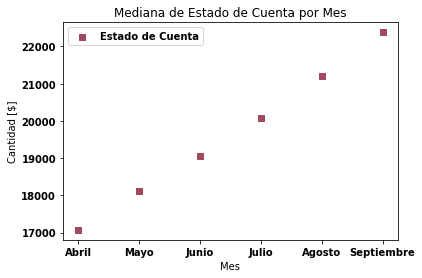

In [ ]:
#Graficando la mediana de los Estados de Cuenta
fig, ax=plt.subplots()
x=['Abril', 'Mayo','Junio', 'Julio', 'Agosto', 'Septiembre']
plt.scatter(x,Bill_Median,c='#a14a5f', marker="s", label='Estado de Cuenta', edgecolors= "#a14a5f")
ax.set_ylabel("Cantidad [$]")
ax.set_xlabel("Mes")
ax.set_title("Mediana de Estado de Cuenta por Mes")
plt.legend(loc='upper left');
plt.show()

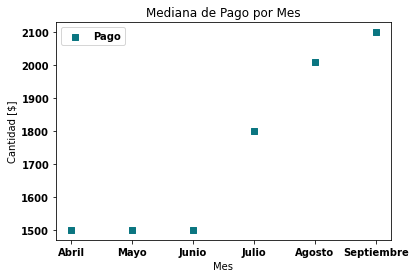

In [ ]:
#Graficando la mediana de los pagos
fig, ax=plt.subplots()
x=['Abril', 'Mayo','Junio', 'Julio', 'Agosto', 'Septiembre']
plt.scatter(x,Pay_Median,c='#0b7681', marker="s", label='Pago', edgecolors= '#0b7681')
ax.set_ylabel("Cantidad [$]")
ax.set_xlabel("Mes")
ax.set_title("Mediana de Pago por Mes")
plt.legend(loc='upper left');
plt.show()

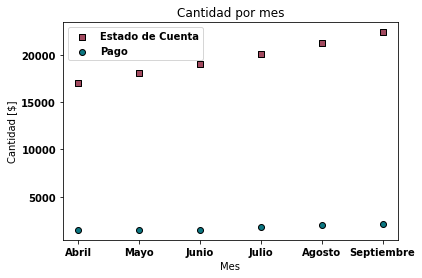

In [ ]:
fig, ax=plt.subplots()
x=['Abril', 'Mayo','Junio', 'Julio', 'Agosto', 'Septiembre']
plt.scatter(x,Bill_Median,c='#a14a5f', marker="s", label='Estado de Cuenta', edgecolor= 'black')
plt.scatter(x,Pay_Median, c='#0b7681', marker="o", label='Pago', edgecolor= 'black')
ax.set_ylabel("Cantidad [$]")
ax.set_xlabel("Mes")
ax.set_title("Cantidad por mes")
plt.legend(loc='upper left');
plt.show()

Se observa que la mediana del saldo de los Estados de Cuenta aumentan en mayor proporión de lo que aumentan los pagos a través del tiempo

Como se analiza en la sección 6.2.1 y 6.2.2, la cantidad del saldo del Estado de Cuenta, la cantidad de Pagos y el límite de crédito varian mucho de persona a persona.  Por esta razón se decide combinar estas variables en una sola:  La deuda expresada como porcentaje del límite de crédito.

La deuda del mes X se define como el saldo del Estado de Cuenta en el mes X menos el pago hecho en el mes X+1. Esta deuda se divide entre el límite de crédito de cada usuario para expresarlo en términos de porcentaje y así dismunir el efecto de los valores atípicos (outliers)

In [ ]:
# Deuda en términos de porcentaje del límite de crédito
df_tarjetas['PercOfAprDebt'] = (df_tarjetas.BILL_AMT5 - df_tarjetas.PAY_AMT6)/df_tarjetas.LIMIT_BAL
df_tarjetas['PercOfMayDebt'] = (df_tarjetas.BILL_AMT4 - df_tarjetas.PAY_AMT5)/df_tarjetas.LIMIT_BAL
df_tarjetas['PercOfJunDebt'] = (df_tarjetas.BILL_AMT3 - df_tarjetas.PAY_AMT4)/df_tarjetas.LIMIT_BAL
df_tarjetas['PercOfJulDebt'] = (df_tarjetas.BILL_AMT2 - df_tarjetas.PAY_AMT3)/df_tarjetas.LIMIT_BAL
df_tarjetas['PercOfAugDebt'] = (df_tarjetas.BILL_AMT1 - df_tarjetas.PAY_AMT2)/df_tarjetas.LIMIT_BAL
#df_tarjetas[['PercOfAprDebt','PercOfMayDebt','PercOfJunDebt','PercOfJulDebt','PercOfAugDebt','default.payment.next.month']].sample(5)

Procederemos a analizar la correlación entre las variables.  Para la correlación entre las variables continuas (porcentaje de deuda) se recomienda la correlación de Pearson.

In [ ]:
#Matriz de correlación
Debt = df_tarjetas.filter(items=['PercOfAprDebt','PercOfMayDebt','PercOfJunDebt','PercOfJulDebt','PercOfAugDebt','default.payment.next.month'])
#corrMatrix = Debt.corr()
#print(corrMatrix)
#MatrizCorr = sns.load_dataset("Debt")

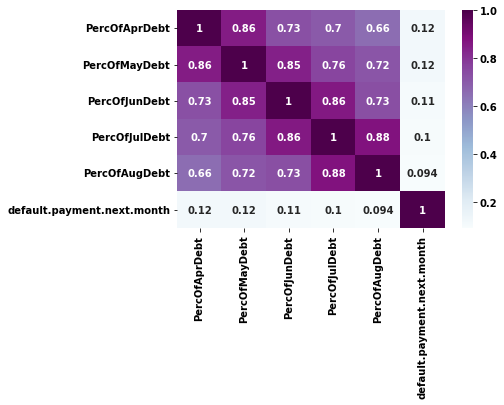

In [ ]:
#Graficando el heatmap para la matriz de correlación
ax = sns.heatmap(Debt.corr(), annot=True, cmap= "BuPu")

Para la correlación de las variables continuas con la categórica (si cae o no en impago), la literatura sugiere utilizar la correlación biserial

In [ ]:
corr_list = []
y = Debt['default.payment.next.month']
for column in Debt:
    x=Debt[column]
    corr = stats.pointbiserialr(list(x), list(y))
    corr_list.append(corr[0])
print(corr_list)

[0.12124045977040204, 0.11955720457170083, 0.10698341825958513, 0.10252353390549696, 0.09391207621956689, 1.0]


En este caso, se observa que los resultados de la correlación utilizando Pearson y biserial son muy similares.

De la matriz de correlación se observa que de las variables "Porcentaje de Deuda", la que tiene más influencia (mayor correlación) con la varialbe de salida buscada (defult.payment.next.month) es el procentaje de deuda correspondiente al mes de Abril, con una correlación de 0.12.  Sin embargo, esta correlación es muy baja, por lo que **no existe una evidencia estadística fuerte de que las personas cuya deuda está más próxima a su límite de crédito tienden a caer más en impago.**

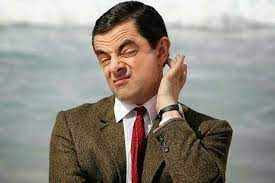

###**5.2.2 ¿Las personas que se han retrasado más en sus pagos tienden a caer más en impago?**

Nuestra lógica diría que las personas se retrasan en sus pagos es porque no tienen el dinero para realizar los mismos.  Y como la deuda sigue aumentando no sólo por el nuevo consumo, sino por los intereses de la deuda anterior, pues conforme pasa el tiempo a las personas les será cada vez más difícil saldar la deuda y llegará el momento de que caigan en impago. 

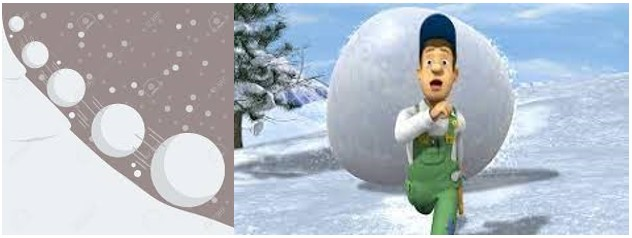

Veremos si los datos respaldan esta hipótesis...

Primero se procede a echar un vistazo a las columnas que reflejan el estado de pago

In [ ]:
df_tarjetas[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2',
   'PAY_0']].describe()

,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.291100,-0.266200,-0.220667,-0.166200,-0.133767,-0.016700
std,1.149988,1.133187,1.169139,1.196868,1.197186,1.123802
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
df_tarjetas[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2',
   'PAY_0']].value_counts()

PAY_6  PAY_5  PAY_4  PAY_3  PAY_2  PAY_0
 0      0      0      0      0      0       9821
-2     -2     -2     -2     -2     -2       2109
-1     -1     -1     -1     -1     -1       1992
-2     -2     -2     -2     -2      1        651
 2      2      2      2      2      2        530
                                            ... 
-2      2      2      3     -1     -1          1
 0      2      3      0      0      2          1
                     -1      2      1          1
                            -2      1          1
 8      8      8      8      2      2          1
Length: 1106, dtype: int64

Se observa que las columnas PAY_n muestran las categorías no definidas "0" y "-2".  Si, de acuerdo a la información proporcionada con el data set, los número positivos reflejan la cantidad de meses de atraso, se asumirá que las categorías "0" y "-2" deben corresponder a la categoría "-1", es decir, que se pagó en tiempo y forma




In [ ]:
fil = (df_tarjetas.PAY_0 == -2) | (df_tarjetas.PAY_0 == 0)
df_tarjetas.loc[fil, 'PAY_0'] = -1
fil = (df_tarjetas.PAY_2 == -2) | (df_tarjetas.PAY_2 == 0)
df_tarjetas.loc[fil, 'PAY_2'] = -1
fil = (df_tarjetas.PAY_3 == -2) | (df_tarjetas.PAY_3 == 0)
df_tarjetas.loc[fil, 'PAY_3'] = -1
fil = (df_tarjetas.PAY_4 == -2) | (df_tarjetas.PAY_4 == 0)
df_tarjetas.loc[fil, 'PAY_4'] = -1
fil = (df_tarjetas.PAY_5 == -2) | (df_tarjetas.PAY_5 == 0)
df_tarjetas.loc[fil, 'PAY_5'] = -1
fil = (df_tarjetas.PAY_6 == -2) | (df_tarjetas.PAY_6 == 0)
df_tarjetas.loc[fil, 'PAY_6'] = -1
df_tarjetas[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2',
   'PAY_0']].describe()




,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.670800,-0.679567,-0.624233,-0.555500,-0.532033,-0.415967
std,1.005283,1.001726,1.067522,1.126275,1.146393,1.142591
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Ahora sí, ya con el dataset corregido, procederemos a realizar el análisis para aceptar o descartar la hipótesis en cuestión.

In [ ]:
df_tarjetas[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2',
   'PAY_0', 'default.payment.next.month']].sample(5)

,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,default.payment.next.month
851,-1,-1,-1,2,2,1,0
7037,2,3,2,2,2,2,0
5891,-1,-1,-1,-1,-1,-1,0
17284,-1,-1,-1,-1,-1,-1,1
13132,-1,-1,-1,-1,-1,-1,0


In [ ]:
df_tarjetas_meses=df_tarjetas.rename({'PAY_6': 'Pago_Abril', 'PAY_5': 'Pago_Mayo', 'PAY_4': 'Pago_Junio', "PAY_3" : "Pago_Julio ", "PAY_2":"Pago_Agosto", 'PAY_0': "Pago_Septiembre"}, axis=1)

Procederemos a analizar la correlación entre las variables. Para la correlación entre las variables continuas (cantidad de meses de atraso) se recomienda la correlación de Pearson.

In [ ]:
#Matriz de correlación
Debt = df_tarjetas_meses.filter(items=['Pago_Abril','Pago_Mayo','Pago_Junio','Pago_Julio','Pago_Agosto', 'Pago_Septiembre','default.payment.next.month'])
corrMatrix = Debt.corr()
#print(corrMatrix)

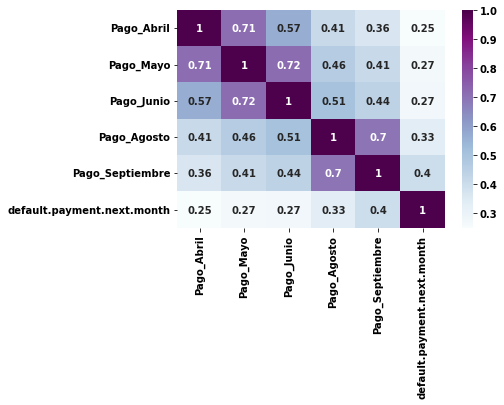

In [ ]:
#Graficando el heatmap para la matriz de correlación
ax = sns.heatmap(corrMatrix, annot=True, cmap= "BuPu")

Para la correlación de las variables continuas con la categórica (si cae o no en impago), la literatura sugiere utilizar la correlación biserial

In [ ]:
corr_list = []
y = Debt['default.payment.next.month']
for column in Debt:
    x=Debt[column]
    corr = stats.pointbiserialr(list(x), list(y))
    corr_list.append(corr[0])
print(corr_list)

[0.2482522526973711, 0.2664652773197608, 0.27477882650464347, 0.3334377831048533, 0.39863579584882736, 1.0]


En este caso, se observa que los resultados de la correlación utilizando Pearson y biserial son muy similares.

Dado que se obtiene un coeficiente de correlación entre a) el estado de pago en Septiembre y b) la condición de impago de 0.39, esto indica que hay una correlación mediana entre ambas variables. Por tal motivo, no se rechaza la hipótesis en estudio. Es decir, **se encuentra cierta relación entre los meses de retraso en Septiembre y el estado de impago**

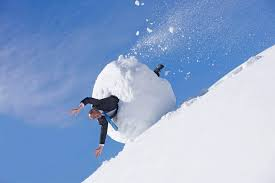

### **Conclusiones de las variables históricas/financieras**

En este punto termina el análisis de las variables históricas/financieras.  Resumiendo, las conclusiones encontradas se listan a continuación:

1. Se encontró una relación baja entre a) la deuda expresado como porcentaje del límite de crédito y b) la condición de impago
2. Se encontró una relación mediana entre a) los meses de atraso en el pago (en el mes de Septiembre) con la condición de impago

Por lo tanto, se recomienda al banco poner atención detallada en aquellos usuarios que empiezan a atrasarse en su pago, ya que es posible que lleguen a caer en impago.

## **Conclusiones Generales del Análisis Exploratorio**

1. En el proceso de aprobación de tarjetas, se recomienda al banco poner atención especial en las solicitudes de personas del sexo masculino, con un nivel de estudio bajo, no solteras y de edad avanzada, ya que este grupo tiene más probabilidades de caer en impago.

2. En el monitoreo de las cuentas, se recomienda al banco poner atención detallada en aquellos usuarios que empiezan a atrasarse en su pago, ya que es posible que lleguen a caer en impago.

3. En el monitoreo de las cuentas, se sugiere al banco poner atención especial en los usuarios del sexo masculino, con un nivel de estudio bajo, no solteras y de edad avanzada, que empiezan a atrasarse con su pago, ya que el riesgo de que caigan en impago es alto



## **6. Data Wrangling**

###**6.1 Datos Nulos**

Como paso inicial, se revisará si los datos están completos.

In [ ]:
df_tarjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df_tarjetas.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
PercOfAprDebt                 0
PercOfMayDebt                 0
PercOfJunDebt                 0
PercOfJulDebt                 0
PercOfAugDebt                 0
dtype: int64

No se encuentran datos nulos en ninguna variable, por lo que el dataset está completo

###**6.2 Tipos de Datos**

Se visualiza el tipo de datos que contiene nuestro dataset

In [ ]:
df_tarjetas.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
PercOfAprDebt                 float64
PercOfMayDeb

No se encuentra ninguna columna cuyos valores sean del tipo "string", por lo que no se requiere hacer un "trim" de los mismos para eliminar los espacios no necesarios.

Del mismo modo, no tenemos ninguna columna que represente una fecha para convertir la misma al tipo "datetime".

###**6.3 Registros Duplicados**

Se revisa si hay datos duplicados

In [ ]:
df_tarjetas.duplicated().sum()

0

Se encuentra que no existen datos duplicados

###**6.4 Creación del índice**

Una vez que se ha revisado si hay datos nulos y registros duplicados, se procede a la definición del índice.

In [ ]:
#Definimos el índice y las columnas del Dataset
df_tarjetas.index = df_tarjetas['ID']
df_tarjetas = df_tarjetas.drop('ID', axis='columns')
df_tarjetas

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PercOfAprDebt,PercOfMayDebt,PercOfJunDebt,PercOfJulDebt,PercOfAugDebt
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-1,...,0.0,0.0,0.0,0.0,1,0.000000,0.000000,0.034450,0.155100,0.161200
2,120000.0,2,2,2,26,-1,2,-1,-1,-1,...,1000.0,1000.0,0.0,2000.0,1,0.012125,0.027267,0.014017,0.006042,0.014017
3,90000.0,2,2,2,34,-1,-1,-1,-1,-1,...,1000.0,1000.0,1000.0,5000.0,0,0.110533,0.148122,0.139544,0.144744,0.308211
4,50000.0,2,2,1,37,-1,-1,-1,-1,-1,...,1200.0,1100.0,1069.0,1000.0,0,0.559180,0.544900,0.963820,0.940660,0.899420
5,50000.0,1,2,1,57,-1,-1,-1,-1,-1,...,10000.0,9000.0,689.0,679.0,0,0.369340,0.405020,0.536700,-0.086600,-0.561280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,-1,-1,-1,-1,-1,...,5003.0,3047.0,5000.0,1000.0,0,0.137441,0.377291,0.933264,0.853691,0.767945
29997,150000.0,1,3,2,43,-1,-1,-1,-1,-1,...,8998.0,129.0,0.0,0.0,0,0.034600,0.059860,0.022487,-0.047800,-0.012287
29998,30000.0,1,2,2,37,4,3,2,-1,-1,...,22000.0,4200.0,2000.0,3100.0,1,0.582733,0.629267,-0.048067,-0.621467,0.118833


###**6.5 Valores Atípicos**

En la sección 5 se encontraron ciertos valores no definidos en cuanto a las variables categóricas, los cuales fueron corregidos en dicha sección.  

Respecto a las variable numérica edad, ésta se abordó en la sección 5.1.4 no encontrándose valores atípicos para la misma.

El resto de las variables numéricas (Saldo, Pago y Límite de Crédito) se analizarán en las siguientes subsecciones. 

###**6.5.1 Variables Saldo y Pago**

Se comienza analizando la variable Saldo del mes de Septiembre del 2005



In [ ]:
df_tarjetas.BILL_AMT1.describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

Text(0.5, 0, 'Septiembre 2005')

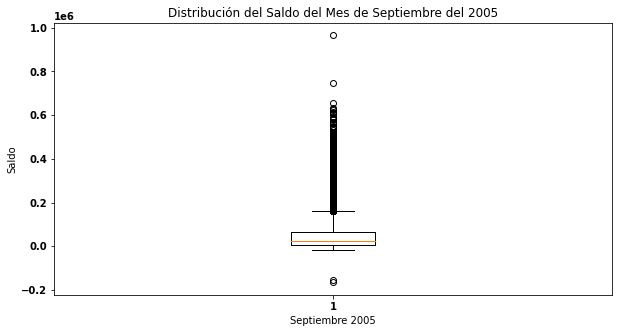

In [ ]:
#Graficamos usando Boxplot para visualizarlo mejor
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(x= df_tarjetas.BILL_AMT1)
ax.set_title('Distribución del Saldo del Mes de Septiembre del 2005')
ax.set_ylabel('Saldo')
ax.set_xlabel('Septiembre 2005')

Se observa que hay muchos puntos positivos más allá de los bigotes de la caja. Estos puntos representan valores atípicos, por lo que la tentación de eliminarlos podría ser muy alta, pero ¿sería aconsejable eliminarlos?.  Estos valores altos representan saldos muy altos en el estado de cuenta y seguramente al dueño del banco no le gustaría que de la noche a la mañana alguien borrara la deuda de algunos de sus clientes.  Eso es lo que se estaría haciendo si se decidiera eliminarlos.  Simplemente hay que tener presente que en la población bancaria hay gente muy rica que puede manejar saldos muy altos sin problema, por lo que no es conveniente eliminarlos.

Aunque sólo se analizó el mes de Septiembre, lo mismo aplicaría para el resto de los meses.

Se puede intuir que con la variable pago pasaría exactamente lo mismo ya que dicha variable, en términos generales, está en función del saldo.

###**6.5.2 Variable Límite de Crédito**

En esta sección se analizará la variable límite de crédito

In [ ]:
df_tarjetas.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Text(0.5, 0, 'Usuarios')

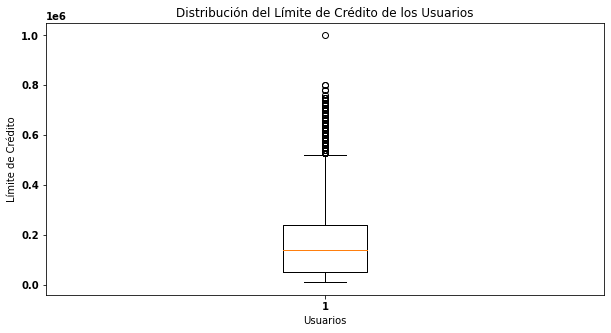

In [ ]:
#Graficamos usando Boxplot para visualizarlo mejor
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(x= df_tarjetas.LIMIT_BAL)
ax.set_title('Distribución del Límite de Crédito de los Usuarios')
ax.set_ylabel('Límite de Crédito')
ax.set_xlabel('Usuarios')

Al igual que con las variables Saldo y Pago, se observa que hay muchos puntos positivos más allá de los bigotes de la caja. La tentación de eliminarlos podría ser muy alta, pero ¿sería aconsejable eliminarlos? Nuevamente, hay que tener presente que en la población bancaria hay gente muy rica que puede manejar límites de crédito muy altos sin problema, por lo que no es conveniente eliminarlos.

###**6.5.3 Tratamiento de los valores atípicos / Feature Engineering**

Entonces, si no es conveniente eliminar los saldos, pagos y límites de crédito atípicos, ¿cómo tratar con ellos de tal forma que no contaminen el proceso de aprendizaje de un modelo de Machine Learning?

Ya que se espera que a saldos y pagos muy altos correspondan también límites de créditos altos, se sugiere combinarlos en una variable llamada deuda, expresada como un porcentaje de los límites de crédito, como se detalla en la sección 5.2.1

In [ ]:
#Se eliminan las variables estado de cuenta, pago y límite de crédito ya que éstas ya fueron ocupadas para obtener las nuevas variables porcentaje de deuda
df_tarjetas = df_tarjetas.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','LIMIT_BAL'], axis=1)
df_tarjetas.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month',
       'PercOfAprDebt', 'PercOfMayDebt', 'PercOfJunDebt', 'PercOfJulDebt',
       'PercOfAugDebt'],
      dtype='object')

###**6.6 Selección de Variables**

La selección de variables para el proceso de entrenamiento del modelo se realizará a través de métodos de filtración a través de la Estadística y Wrapper Methods.  Se tomó la página de [Machine Learning Mastery](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/) como fuente de la información de los procesos seguidos en esta sección.

La imagen que se muestra a continuación provee un resumen de la jerarquía de las técnicas de selección de variables.

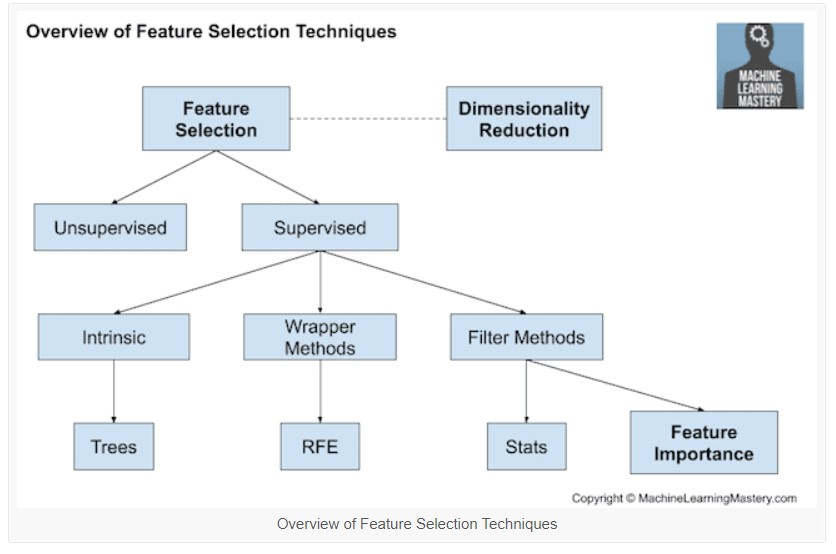

El siguiente diagrama muestra algunos métodos estadísticos de una sola variable que pueden ser usados.

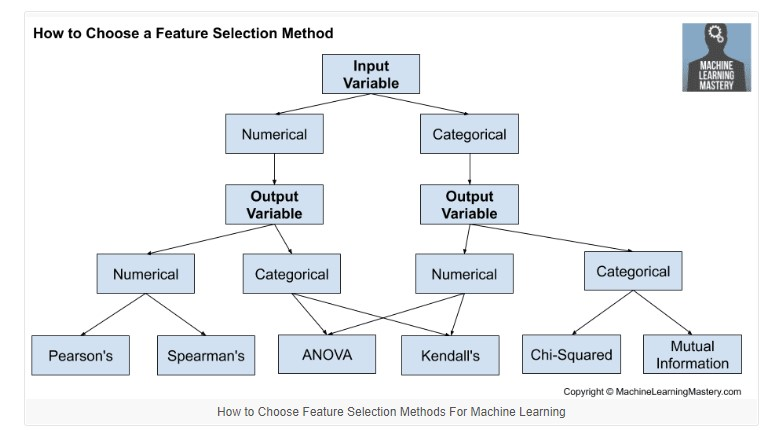

### **6.6.1 Filtros Estadísticos**

### **6.6.1.1 Variables de entrada numéricas**

ANOVA puede ser utilizado para identificar cuáles de todas las variables numéricas de entrada tienen mayor infulencia en la variable categórica de salida (impago o no impago).

Se empezará con este método para ir descartando las variables numéricas con poca influencia.

Se tomó como referencia el proceso descrito en [Machine Learning Magistery](https://machinelearningmastery.com/feature-selection-with-numerical-input-data/)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [ ]:
# El dataset se divide en variables de entrada (X) y salida (Y).
X = df_tarjetas.drop(['default.payment.next.month'], axis = 1)
Y = df_tarjetas['default.payment.next.month']






In [ ]:
# feature selection
def select_features(X_train, Y_train, X_test):
	# Se configura para seleccionar todas las características
	fs = SelectKBest(score_func=f_classif, k='all')
	# Aprende las relaciones de los datos de entrenamiento
	fs.fit(X_train, Y_train)
	# transform los datos de entrada del set de entrenamiento
	X_train_fs = fs.transform(X_train)
	# transform los datos de entrada del set de prueba
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 27.193614
Feature 1: 25.836366
Feature 2: 16.968710
Feature 3: 9.697002
Feature 4: 3781.888653
Feature 5: 2581.123891
Feature 6: 1808.714570
Feature 7: 1591.671033
Feature 8: 1475.812332
Feature 9: 1244.037337
Feature 10: 289.110159
Feature 11: 296.392522
Feature 12: 227.534564
Feature 13: 198.607183
Feature 14: 169.316575


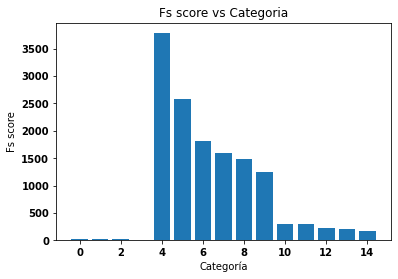

In [ ]:
# se dividen los datos en el set de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
# se obtienen las medidas de las características
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# se grafican las medidas
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.xlabel('Categoría')
pyplot.ylabel('Fs score')
pyplot.title('Fs score vs Categoria')
pyplot.show()

Se observa que las características con una mayor medida (más relevantes) son las correspondientes de la 4 a la 9.  Se busca cuáles son éstas.

In [ ]:
X.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'PercOfAprDebt', 'PercOfMayDebt',
       'PercOfJunDebt', 'PercOfJulDebt', 'PercOfAugDebt'],
      dtype='object')

Se encuentra que, en términos generales, éstas corresponden a la cantidad de meses de atrasos en pagos.

Las siguientes en relevancia tienen que ver con la deuda en los diferentes meses (expresadas en términos de porcentaje del límite de crédito).  

Ahora la pregunta es ¿se necesita usar todas las variables de entrada de PAY_0 a PAY_6? o ¿acaso estarán dando de alguna manera la misma información?

Para contestar esto se evalúa la correlación entre las mismas.

In [ ]:
PAY = df_tarjetas.filter(items=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
corrMatrix = PAY.corr()
print(corrMatrix)

          PAY_0     PAY_2     PAY_3     PAY_4     PAY_5     PAY_6
PAY_0  1.000000  0.700321  0.498070  0.440578  0.410408  0.363695
PAY_2  0.700321  1.000000  0.654905  0.509104  0.464947  0.412276
PAY_3  0.498070  0.654905  1.000000  0.664212  0.531564  0.476073
PAY_4  0.440578  0.509104  0.664212  1.000000  0.717638  0.566442
PAY_5  0.410408  0.464947  0.531564  0.717638  1.000000  0.714158
PAY_6  0.363695  0.412276  0.476073  0.566442  0.714158  1.000000


De esta matriz de correlación puede observarse que hay una dependencia alta entre estas variables, sobre todo entre las adyacentes.  Es decir, que la dependencia va disminuyendo conforme las variables se van alejando, por lo que de todas éstas, se decide tomar únicamente PAY_0 y PAY_3 y PAY_5 para el proceso de entrenamiento del modelo.

De manera análoga, ¿se necesita usar todas las variables de entrada de deuda (PercOfDebt) o ¿acaso estarán dando de alguna manera la misma información?

Para contestar esto se evalúa la correlación entre las mismas.

In [ ]:
PercOfDebt = df_tarjetas.filter(items=['PercOfAprDebt','PercOfMayDebt','PercOfJunDebt','PercOfJulDebt','PercOfAugDebt'])
corrMatrix = PercOfDebt.corr()
print(corrMatrix)

               PercOfAprDebt  PercOfMayDebt  PercOfJunDebt  PercOfJulDebt  \
PercOfAprDebt       1.000000       0.855266       0.733315       0.703996   
PercOfMayDebt       0.855266       1.000000       0.845431       0.760982   
PercOfJunDebt       0.733315       0.845431       1.000000       0.863626   
PercOfJulDebt       0.703996       0.760982       0.863626       1.000000   
PercOfAugDebt       0.655799       0.718843       0.734904       0.878662   

               PercOfAugDebt  
PercOfAprDebt       0.655799  
PercOfMayDebt       0.718843  
PercOfJunDebt       0.734904  
PercOfJulDebt       0.878662  
PercOfAugDebt       1.000000  


De manera similar se observa que hay una dependencia alta entre estas variables, sobre todo entre las adyacentes.  Es decir, que la dependencia va disminuyendo conforme las variables se van alejando.

En todos los casos se obtuvieron coeficientes de correlación mayores a 0.5 por lo que hay una correlación fuerte entre todas estas variables.  Por este motivo únicamente se ocuparán *PercOfAprDebt* y *PercOfAugDebt* 

### **Variables numéricas seleccionadas**

De los análisis ANOVA anteriores, las siguientes variables numéricas fueron seleccionadas para incluirse en el modelo de Machine Learning:



1.   PAY_0
2.   PAY_3
3.   PAY_5
4.   PercOfAprDebt
5.   PercOfAugDebt



In [ ]:
# Se descartan algunas variables de meses de atraso (PAY) y deuda (PercOfDebt)
df_tarjetas = df_tarjetas.drop(['PAY_2','PAY_4','PAY_6','PercOfMayDebt','PercOfJunDebt','PercOfJulDebt'], axis=1)
df_tarjetas.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_3', 'PAY_5',
       'default.payment.next.month', 'PercOfAprDebt', 'PercOfAugDebt'],
      dtype='object')

Algo importante a resaltar es que ANOVA es recomendado para los casos cuando las variables de entrada son numéricas, por lo que ninguna de las variables de entrada categóricas se ha descartado hasta este momento.

### **6.6.1.2 Variables de entrada categóricas**

### **6.6.1.2.1 Género**

Tanto la variable de entrada (género) como la de salida (impago) son categóricas, y habiendo decidido previamente que se utilizarán métodos estadísticos, quedan dos caminos posibles: a) Chi-Cuadrada o b) Información Mutua.  Dado que los autores de este proyecto están más familiarizados con Chi-Cuadrada, se optó por ese camino.

La prueba Chi-cuadrada es una prueba de hipótesis estadística que asume (la hipótesis nula) que las frecuencias observadas para una variable categórica igualan las frecuencias esperadas para la variable categórica.  La prueba calcula un estadístico que tiene una distribución chi-cuadrada y puede ser interpretado para aceptar o rechazar la suposición o hipótesis nula de que las frecuencias esperadas y observadas son las mismas. Las variables se consideran independientes si las frecuencias observadas y esperadas son similares.

Nuevamente, se tomó como referencia el proceso descrito en [Machine Learning Mastery](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

Se empieza el análisis creando la tabla de contingencia:

In [ ]:
genero = df_tarjetas.groupby(['SEX', 'default.payment.next.month']).size().unstack(1)
genero

default.payment.next.month,0,1
SEX,,
1,9015,2873
2,14349,3763


Con ésta se procede a la prueba estadística:

In [ ]:
stat, p, dof, expected = chi2_contingency(genero)
print('dof=%d' % dof)
print(expected)
#interpretación de la pureba estadistica
prob = 0.95
critical = chi2.ppf(prob,dof) 
print('probablidad=%.3f, critical=%.3f, stat=%.3f' %(prob, critical, stat))
if abs(stat) >= critical:
  print('Dependiente (se rechaza H0)')
else:
  print('Independiente (No se rechaza H0)')
# interpretación de p-value
alpha = 1 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <=alpha:
  print('Dependiente (Se rechaza H0)')
else:
  print ('Independiente (No se rechaza H0)')

dof=1
[[ 9258.3744  2629.6256]
 [14105.6256  4006.3744]]
probablidad=0.950, critical=3.841, stat=47.709
Dependiente (se rechaza H0)
significance=0.050, p=0.000
Dependiente (Se rechaza H0)


Por lo que se concluye que las variables son dependientes, es decir, **la variable género es relevante para el estado de impago**

### **6.6.1.2.2 Nivel de Estudios**

Tanto la variable de entrada (Nivel de Estudios) como la de salida (impago) son categóricas, y habiendo decidido previamente que se utilizarán métodos estadísticos, quedan dos caminos posibles: a) Chi-Cuadrada e b) Información Mutua. Dado que los autores de este proyecto están más familiarizados con Chi-Cuadrada, se optó por ese camino.

Se empieza el análisis creando la tabla de contingencia:

In [ ]:
Estudios = df_tarjetas.groupby(['EDUCATION', 'default.payment.next.month']).size().unstack(1)
Estudios

default.payment.next.month,0,1
EDUCATION,,
1,8549,2036
2,10700,3330
3,3680,1237
4,435,33


Con ésta se procede a la prueba estadística:

In [ ]:
stat, p, dof, expected = chi2_contingency(Estudios)
print('dof=%d' % dof)
print(expected)
#interpretación de la pureba estadistica
prob = 0.95
critical = chi2.ppf(prob,dof) 
print('probablidad=%.3f, critical=%.3f, stat=%.3f' %(prob, critical, stat))
if abs(stat) >= critical:
  print('Dependiente (se rechaza H0)')
else:
  print('Independiente (No se rechaza H0)')
# interpretación de p-value
alpha = 1 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <=alpha:
  print('Dependiente (Se rechaza H0)')
else:
  print ('Independiente (No se rechaza H0)')

dof=3
[[ 8243.598   2341.402 ]
 [10926.564   3103.436 ]
 [ 3829.3596  1087.6404]
 [  364.4784   103.5216]]
probablidad=0.950, critical=7.815, stat=160.410
Dependiente (se rechaza H0)
significance=0.050, p=0.000
Dependiente (Se rechaza H0)


Por lo que se concluye que las variables son dependientes, es decir, **la variable Estudios es relevante para el estado de impago.**

### **6.6.1.2.3 Estado Civil**

Tanto la variable de entrada (Estado Civil) como la de salida (impago) son categóricas, y habiendo decidido previamente que se utilizarán métodos estadísticos, quedan dos caminos posibles: a) Chi-Cuadrada e b) Información Mutua. Dado que los autores de este proyecto están más familiarizados con Chi-Cuadrada, se optó por ese camino.

Se empieza el análisis creando la tabla de contingencia:

In [ ]:
Civil = df_tarjetas.groupby(['MARRIAGE', 'default.payment.next.month']).size().unstack(1)
Civil

default.payment.next.month,0,1
MARRIAGE,,
1,10453,3206
2,12623,3341
3,288,89


Con ésta se procede a la prueba estadística:

In [ ]:
stat, p, dof, expected = chi2_contingency(Civil)
print('dof=%d' % dof)
print(expected)
#interpretación de la pureba estadistica
prob = 0.95
critical = chi2.ppf(prob,dof) 
print('probablidad=%.3f, critical=%.3f, stat=%.3f' %(prob, critical, stat))
if abs(stat) >= critical:
  print('Dependiente (se rechaza H0)')
else:
  print('Independiente (No se rechaza H0)')
# interpretación de p-value
alpha = 1 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <=alpha:
  print('Dependiente (Se rechaza H0)')
else:
  print ('Independiente (No se rechaza H0)')

dof=2
[[10637.6292  3021.3708]
 [12432.7632  3531.2368]
 [  293.6076    83.3924]]
probablidad=0.950, critical=5.991, stat=28.130
Dependiente (se rechaza H0)
significance=0.050, p=0.000
Dependiente (Se rechaza H0)


Por lo que se concluye que las variables son dependientes, es decir, **la variable Estado Civil es relevante para el estado de impago.**

### **Variables categóricas seleccionadas**

De las pruebas Chi-cuadrada anteriores, las siguientes variables categóricas fueron seleccionadas para incluirse en el modelo de Machine Learning:

1.   Género
2.   Nivel de Estudios
3.   Estado Civil

### **6.6.2 Wrapper Methods**

### **6.6.2.1 Forward Selection**



In [ ]:
# El dataset se divide en variables de entrada (X) y salida (Y).
X = df_tarjetas.drop(['default.payment.next.month'], axis = 1)
Y = df_tarjetas['default.payment.next.month']

In [ ]:
import statsmodels.api as sm

# creamos una función para que realice este proceso.
# la función necesita tres parametros y minimamente dos, data y target
# el tercero es opcional, si no se da se toma el valor predefinido SL=0.01
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
features_forward = forward_selection(X,Y)

<ipython-input-389-59ec699a3414>:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: Futu

In [ ]:
features_forward

['PAY_3', 'PAY_0', 'PAY_5', 'PercOfAugDebt', 'MARRIAGE', 'SEX']

### **6.6.2.2 Backward Selection**

In [ ]:
# creamos una función para que realice este proceso.
# la función necesita tres parametros y minimamente dos, data y target
# el tercero es opcional, si no se da, se toma el valor predefinido SL=0.05

def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
features_back = backward_elimination(X,Y)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
features_back

['SEX', 'MARRIAGE', 'PAY_0', 'PAY_3', 'PAY_5', 'PercOfAugDebt']

### **6.6.2.3 Eliminación bidireccional**

In [ ]:
import statsmodels.api as sm

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [ ]:
features_bi = stepwise_selection(X,Y)

<ipython-input-395-9796a1fc2108>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: Futur

In [ ]:
features_bi

['PAY_3', 'PAY_0', 'PAY_5', 'PercOfAugDebt', 'MARRIAGE', 'SEX']

Se compara entre los métodos estadísticos (ANOVA para entradas numéricas y Chi-cuadrada para entradas categóricas) y de Wrapper seleccionados (Fordward Selection, Backward Selection y Eliminación bidireccional) y se observa concordancia en las variables PAY_5, PAY_0, PAY_3, PercOfAugDebt, MARRIAGE and SEX, por lo cual estás variables se tienen que incluir en el modelo.

Sin embargo, se decidió también incluir las variable categórica extra detectada por Chi-quadrada (Nivel de Estudios).

### **Variables de Entrada Seleccionadas**

Las variables numéricas y categóricas que fueron seleccionadas para incluirse en el modelo de Machine Learning son las siguientes:

1.   Género (SEX)
2.   Nivel de Estudios (EDUCATION)
3.   Estado Civil (MARRIAGE)
4.   El estado del pago en Septiembre del 2005 (PAY_0)
5.   El estado del pago en Julio del 2005 (PAY_3)
6.   El estado del pago en Mayo del 2005 (PAY_5)
7.   La deuda del mes de Agosto del 2005 (PercOfAugDebt)
8.   La deuda del mes de Abril del 2005 (PercOfAprDebt)

In [ ]:
# Se descarta la variable Edad, ya que no salió en ninguno de los métodos utilizados
#df_tarjetas = df_tarjetas.drop(['AGE'], axis=1)
#df_tarjetas.columns

###**6.7 Últimos ajustes en el Data Frame**

Antes de adentrarse a entrenar un modelo de Machine Learning (ML), es necesario codificar correctamente las variables categóricas usando one hot encoding. De lo contrario, ciertos algoritmos podrían interpretar que, por ejemplo, el género 2 tiene el doble de importancia que el género 1.  

###**6.7.1 One hot encoding**

En el caso del dataframe obtenido, las variables categóricas ya vienen codificadas, aunque con un label encoding.  Para poder proceder al one hot encoding, primero procedemos a decodificarlas. 

In [ ]:
fil = (df_tarjetas.SEX == 1) #obtenemos el índice los registros donde el valor de la columna SEX sea igual a 1
df_tarjetas.loc[fil,'SEX'] = 'G_masculino' #remplazamos el valor de la columna 'SEX' de los registros encotrados por el valor 'masculino'
fil = (df_tarjetas.SEX == 2) #obtenemos el índice los registros donde el valor de la columna SEX sea igual a 2
df_tarjetas.loc[fil,'SEX'] = 'G_femenino' #remplazamos el valor de la columna 'SEX' de los registros encotrados por el valor 'femenino'
df_tarjetas['SEX'].unique() #revisamos que ahora sólo tengamos categoría 'masculino' y 'femenino'

array(['G_femenino', 'G_masculino'], dtype=object)

In [ ]:
fil = (df_tarjetas.EDUCATION == 1) #obtenemos el índice los registros donde el valor de la columna EDUCATION sea igual a 1
df_tarjetas.loc[fil,'EDUCATION'] = 'E_posgrado' #remplazamos el valor de la columna 'EDUCATION' de los registros encotrados por el valor 'posgrado'
fil = (df_tarjetas.EDUCATION == 2) #obtenemos el índice los registros donde el valor de la columna EDUCATION sea igual a 2
df_tarjetas.loc[fil,'EDUCATION'] = 'E_universidad' #remplazamos el valor de la columna 'EDUCATION' de los registros encotrados por el valor 'universidad'
fil = (df_tarjetas.EDUCATION == 3) #obtenemos el índice los registros donde el valor de la columna EDUCATION sea igual a 3
df_tarjetas.loc[fil,'EDUCATION'] = 'E_preparatoria' #remplazamos el valor de la columna 'EDUCATION' de los registros encotrados por el valor 'preparatoria'
fil = (df_tarjetas.EDUCATION == 4) #obtenemos el índice los registros donde el valor de la columna EDUCATION sea igual a 4
df_tarjetas.loc[fil,'EDUCATION'] = 'E_otros' #remplazamos el valor de la columna 'EDUCATION' de los registros encotrados por el valor 'otros'
df_tarjetas['EDUCATION'].unique() #revisamos que ahora sólo tengamos categoría 'posgrado', 'universidad', 'preparatoria' y 'otros'

array(['E_universidad', 'E_posgrado', 'E_preparatoria', 'E_otros'],
      dtype=object)

In [ ]:
fil = (df_tarjetas.MARRIAGE == 1) #obtenemos el índice los registros donde el valor de la columna MARRIAGE sea igual a 1
df_tarjetas.loc[fil,'MARRIAGE'] = 'EC_casado' #remplazamos el valor de la columna 'MARRIAGE' de los registros encotrados por el valor 'casado'
fil = (df_tarjetas.MARRIAGE == 2) #obtenemos el índice los registros donde el valor de la columna MARRIAGE sea igual a 2
df_tarjetas.loc[fil,'MARRIAGE'] = 'EC_soltero' #remplazamos el valor de la columna 'MARRIAGE' de los registros encotrados por el valor 'soltero'
fil = (df_tarjetas.MARRIAGE == 3) #obtenemos el índice los registros donde el valor de la columna MARRIAGE sea igual a 3
df_tarjetas.loc[fil,'MARRIAGE'] = 'EC_otros' #remplazamos el valor de la columna 'MARRIAGE' de los registros encotrados por el valor 'otro'
df_tarjetas['MARRIAGE'].unique() #revisamos que ahora sólo tengamos categoría 'casado','soltero' y 'otro'

array(['EC_casado', 'EC_soltero', 'EC_otros'], dtype=object)

Ahora sí, procedemos a codificarlas con one hot encoding.

In [ ]:
#obtenemos el tipo de variables que hay en el dataframe
types = pd.DataFrame(df_tarjetas.dtypes)
types

,0
SEX,object
EDUCATION,object
MARRIAGE,object
AGE,int64
PAY_0,int64
PAY_3,int64
PAY_5,int64
default.payment.next.month,int64
PercOfAprDebt,float64
PercOfAugDebt,float64


In [ ]:
# Guardamos registro de cuáles son las varibles categoricas u objeto
categoricas = types.index[types[0]=='object'].values
categoricas

array(['SEX', 'EDUCATION', 'MARRIAGE'], dtype=object)

In [ ]:
df_dummies = df_tarjetas.copy()
for col in categoricas:
  df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies[col]).astype(int)],axis=1) #axis = 1 concatena las columnas
  df_dummies.drop(columns=[col],inplace=True) #inplace True elimina la columna en el mismo dataframe

df_dummies.head(5)

,AGE,PAY_0,PAY_3,PAY_5,default.payment.next.month,PercOfAprDebt,PercOfAugDebt,G_femenino,G_masculino,E_otros,E_posgrado,E_preparatoria,E_universidad,EC_casado,EC_otros,EC_soltero
ID,,,,,,,,,,,,,,,,
1,24,2,-1,-1,1,0.000000,0.161200,1,0,0,0,0,1,1,0,0
2,26,-1,-1,-1,1,0.012125,0.014017,1,0,0,0,0,1,0,0,1
3,34,-1,-1,-1,0,0.110533,0.308211,1,0,0,0,0,1,0,0,1
4,37,-1,-1,-1,0,0.559180,0.899420,1,0,0,0,0,1,1,0,0
5,57,-1,-1,-1,0,0.369340,-0.561280,0,1,0,0,0,1,1,0,0


###**6.7.2 Preparando los subconjuntos de entrenamiento y pruebas**

Como se vió en la sección 5.1.1, la probabilidad de que un usuario caiga en impago es del 22.12 %.  Esto significa que en el dataset original, únicamente encontramos 22.12% de casos positivos (usuarios que caen en impago), por lo que el dataset está desbalanceado respecto a la categoría de salida que queremos predecir (si caerá o no en impago).

Esto es un problema, ya que la mayoría de los modelos de Machine Learning esperan ser entrenados con un subconjunto de datos balanceado respecto a la categoría que queremos predecir.  Es decir, si queremos predecir si un usuario caerá o no en impago, el modelo de Machine Learning espera cantidades similares de instancias positivas o negativas.  

Dado que no es posible obtener más instancias positivas, existen las siguientes posibles soluciones:

a) Undersampling:  Remover instancias negativas

b) **Oversampling:**  Aumentar artificialmente (repitiendo instancias) las instancias positivas

c) En los árboles de decisión, darle mayor peso a los votos de 
las instancias positivas


Se optó por la soución b) debido a:

1. Los modelos de Machine Learning aprenden mejor a medida que se les muestran más instancias
2. Esta técnica da la flexibilidad de ocupar varios modelos de Machine Learning y no sólo limitarlo a árboles de decisión 

In [ ]:
# El dataset se divide en variables de entrada (X) y salida (Y).
X = df_dummies.drop(['default.payment.next.month'], axis = 1)
Y = df_dummies['default.payment.next.month']


In [ ]:
X

,AGE,PAY_0,PAY_3,PAY_5,PercOfAprDebt,PercOfAugDebt,G_femenino,G_masculino,E_otros,E_posgrado,E_preparatoria,E_universidad,EC_casado,EC_otros,EC_soltero
ID,,,,,,,,,,,,,,,
1,24,2,-1,-1,0.000000,0.161200,1,0,0,0,0,1,1,0,0
2,26,-1,-1,-1,0.012125,0.014017,1,0,0,0,0,1,0,0,1
3,34,-1,-1,-1,0.110533,0.308211,1,0,0,0,0,1,0,0,1
4,37,-1,-1,-1,0.559180,0.899420,1,0,0,0,0,1,1,0,0
5,57,-1,-1,-1,0.369340,-0.561280,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,39,-1,-1,-1,0.137441,0.767945,0,1,0,0,1,0,1,0,0
29997,43,-1,-1,-1,0.034600,-0.012287,0,1,0,0,1,0,0,0,1
29998,37,4,2,-1,0.582733,0.118833,0,1,0,0,0,1,0,0,1


In [ ]:
X.columns

Index(['AGE', 'PAY_0', 'PAY_3', 'PAY_5', 'PercOfAprDebt', 'PercOfAugDebt',
       'G_femenino', 'G_masculino', 'E_otros', 'E_posgrado', 'E_preparatoria',
       'E_universidad', 'EC_casado', 'EC_otros', 'EC_soltero'],
      dtype='object')

In [ ]:
Y.unique() #nos aseguramos de que la salida sólo tenga dos valores posibles

array([1, 0])

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#se hace un oversampling para balancear la cantidad de datos target de condición de impago
oversample = RandomOverSampler(sampling_strategy='minority')  

# se realiza el oversampling del dataset para balancear los datos
X_over, Y_over = oversample.fit_resample(X, Y) 


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#Se hace la división en subconjuntos de training y test
X_train, X_test, Y_train, Y_test = train_test_split(X_over, Y_over, test_size= 0.33, random_state= 1) 
print(Y_train.value_counts())
print(Y_test.value_counts())


1    15673
0    15634
Name: default.payment.next.month, dtype: int64
0    7730
1    7691
Name: default.payment.next.month, dtype: int64


Como puede observarse, tanto el subconjunto de entrenamiento como el de prueba muestran ya un balance (cantidad de instancias similares) en la categoría de salida. 

In [ ]:
#Hacemos una copia de las variables de entrada antes de eliminar la variable edad de la misma
X_edad = X.copy()
X_train_edad = X_train.copy()
X_test_edad = X_test.copy()
X_test_edad.columns

Index(['AGE', 'PAY_0', 'PAY_3', 'PAY_5', 'PercOfAprDebt', 'PercOfAugDebt',
       'G_femenino', 'G_masculino', 'E_otros', 'E_posgrado', 'E_preparatoria',
       'E_universidad', 'EC_casado', 'EC_otros', 'EC_soltero'],
      dtype='object')

In [ ]:
#Eliminamos la variable edad de las variables de entrada, ya que esta no fue considerada como relevante por ningún metodo
X = X.drop(['AGE'], axis=1)
X_train = X_train.drop(['AGE'], axis=1)
X_test = X_test.drop(['AGE'], axis=1)
X_test.columns

Index(['PAY_0', 'PAY_3', 'PAY_5', 'PercOfAprDebt', 'PercOfAugDebt',
       'G_femenino', 'G_masculino', 'E_otros', 'E_posgrado', 'E_preparatoria',
       'E_universidad', 'EC_casado', 'EC_otros', 'EC_soltero'],
      dtype='object')

###**6.7.3 Escalamiento**

El escalar significa dividir los datos entre su desviación estándar. Notar que el escalado de datos se realiza después de haber dividido los datos para prueba y entrenamiento con la finalidad de evitar fuga de datos. La fuga de datos ocurre cuando la información acerca del dataset para entrenamiento corrompe o influye en el dataset de prueba.

In [ ]:
from sklearn import preprocessing # escala y centra los datos
scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train = scaler1.transform(X_train)
X_test = scaler1.transform(X_test)

## **7. Selección del Algoritmo Apropiado**

El problema abordado es un problema de clasificación, por lo que algoritmos de regresión no serían apropiados. Ya que hablamos de un problema de clasificación supervisado (se conoce si el cliente cayó o no en impago), algoritmos como árboles de decisión y random forests, entre otros, se consideran los apropiados.

## **8. Desarrollo del Algoritmo**

###**8.1 Árbol de Decisión - Primera aproximación (recall 95%)**


Un árbol de decisión en Machine Learning es una estructura de árbol similar a un diagrama de flujo donde un nodo interno representa una característica (o atributo), la rama representa una regla de decisión y cada nodo hoja representa el resultado.

In [ ]:
#importando librerías
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [ ]:
#creando el clasificador
#classifier = DecisionTreeClassifier(max_depth=13, random_state=14)
classifier = DecisionTreeClassifier(random_state=14) 
# entrenado el clasificador
classifier.fit(X_train, Y_train)
# Calculando predicciones en las pruebas
predictions = classifier.predict(X_test)
# Vemos las exactitud del modelo
#Exactitud = accuracy_score(y_true = Y_test, y_pred = predictions)
# Vemos el f1 score del modelo
#F1 = f1_score(y_true = Y_test, y_pred = predictions)
#print('Exactitud = %.4f' % (Exactitud))
#print('F1 = %.4f' % (F1))

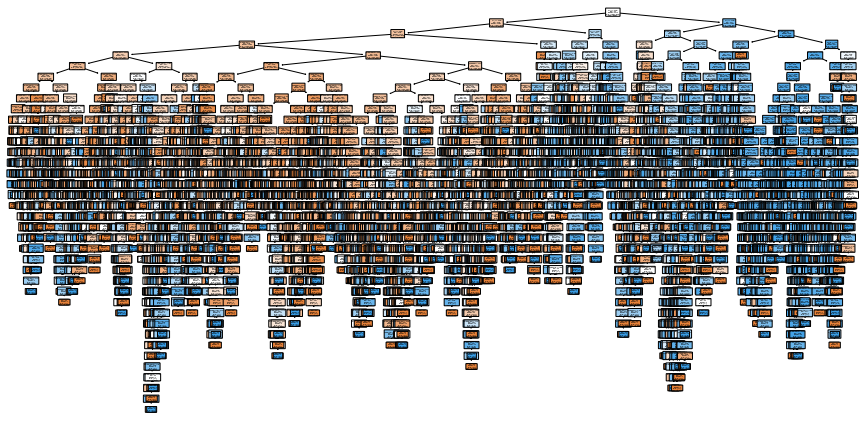

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(classifier, 
          filled=True, 
          rounded=True, 
          class_names=["No Impago", "Impago"], 
          feature_names=X.columns); 
plt.savefig('Tree.png', format='png',dpi=1000)

In [ ]:
#Calculando la matriz de confusión
matriz = confusion_matrix(Y_test,predictions, labels=classifier.classes_)



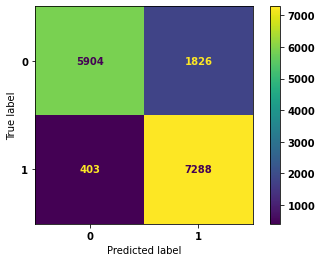

In [ ]:
#Graficando la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      7730
           1       0.80      0.95      0.87      7691

    accuracy                           0.86     15421
   macro avg       0.87      0.86      0.85     15421
weighted avg       0.87      0.86      0.85     15421



Podemos observar del reporte de clasificación que el porcentaje de predicciones correctas (precisión) para el caso positivo de impago (1) es de 80 por ciento [7288/(1826+7288) = 79.9%]

Del mismo modo se observa que el modelo fue capaz de detectar un 95 por ciento de los casos positivos (exhaustividad o recall) [7288/(403+7288) = 94.7%]

También se visualiza un soporte (número de ocurrencias de las clases) balanceado.  La clase 1 (caso positivo de impago) tiene 7,691 ocurrencias, mientras que la clase 0 (caso negativo de impago) tiene 7,730.  

En el caso de este proyecto, el objetivo es detectar cuando un cliente caerá en impago para evitarle pérdidas al banco, por lo que ocuparemos la exhaustividad o recall para evaluar el desempeño de nuestro modelo.

Ahora comparemos su desempeño contra el dataset de entrenamiento

In [ ]:
# Calculando predicciones en las pruebas
predictions_train = classifier.predict(X_train)

print(classification_report(Y_train, predictions_train))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15634
           1       0.97      1.00      0.98     15673

    accuracy                           0.98     31307
   macro avg       0.98      0.98      0.98     31307
weighted avg       0.98      0.98      0.98     31307



Aunque el árbol de decisión creado tiene una muy buena exhaustividad para predecir los casos de impago del dataset de prueba (95%), el que sea capaz de predecirlos al 100% con el dataset de entrenamiento nos deja la impresión de que este modelo está sobreajustado.

###**8.1.1 Poda del Árbol (Ajuste de Hiperparámetros - recall 88%)**

Los **árboles de decisión** son famosos por su tendencia al **sobreajuste** al **dataset de entrenamiento**, por lo que hay muchos parametros como `max_depth` and `min_samples`, que están diseñados para reducir el sobreajuste. Sin embargo, podar (pruning) un árbol con **cost complexity pruning** puede simplificar todo el proceso de encontrar un árbol más pequeño que mejore la exactitud (accuracy) con el **dataset de prueba**.

Podar un árbol consiste en encontrar el valor correcto para el parametro de poda, `alpha`, que controla qué tanto se poda un árbol.  Una manera de encontrar el valor óptimo de `alpha` es graficar la exactitud del árbol como una función de diferentes valores.  Esto se hace tanto para el **dataset de entrenamiento** como para el **dataset de prueba**. 

Para esto, primero se extraerán los diferentes valores de `alpha` que están disponibles para el árbol creado previamente y se construirá un árbol podado para cada valor de `alpha`.  NOTA: Se omitirá el valor máximo de alpha con `ccp_alphas = ccp_alphas [:-1]` porque esto podaría todas las hojas, dejándonos sólo con una raíz, en lugar de un árbol.

In [ ]:
path = classifier.cost_complexity_pruning_path(X_train, Y_train) # determina los valores para alpha
ccp_alphas = path.ccp_alphas # extrae los diferentes valores para alpha
ccp_alphas = ccp_alphas[:-1] # excluye el valor máximo para alpha

clf_dts = [] # crea el arreglo donde almacenaremos los árboles de decisión

## se crea un árbol de decisión para cada valor alpha y lo guardamos en el arreglo
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=14, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, Y_train)
    clf_dts.append(clf_dt)

Ahora se graficará la exactitud de los árboles usando el dataset de entrenamiento y el dataset de prueba como una función de alpha.

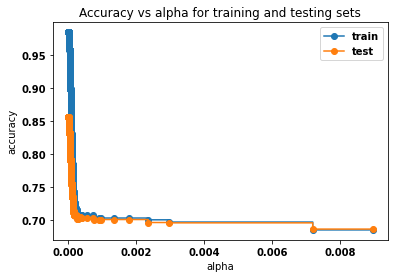

In [ ]:
train_scores = [clf_dt.score(X_train, Y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, Y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Hacemos un acercamiento en la gráfica

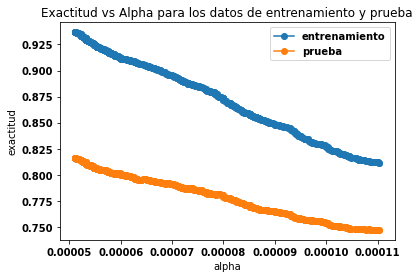

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("exactitud")
ax.set_title("Exactitud vs Alpha para los datos de entrenamiento y prueba")
ax.plot(ccp_alphas[1000:2000], train_scores[1000:2000], marker='o', label="entrenamiento", drawstyle="steps-post")
ax.plot(ccp_alphas[1000:2000], test_scores[1000:2000], marker='o', label="prueba", drawstyle="steps-post")
ax.legend()
plt.show()

Nos damos cuenta que conforme aumenta el valor de alpha, los valores de la exactitud del valor prueba y entrenamiento disminuyen, y aunque no se interceptan, se acercan entre ellos.

Se decide que con un alpha de 0.00006 se tiene una exactitud de alrededor del 80% entre ambos datasets (el de entrenamiento y el de prueba). Esta exactitud similar asegura que no se tenga un sobreajuste con el daset de entrenamiento. 

Se procede a crear el árbol de decisión podado con un alpha =0.00008

In [ ]:
#asignando el alpha optimizado
opt_ccp_alpha = 0.00006

#creando el clasificador
clf_dt_pruned = DecisionTreeClassifier(random_state=14,ccp_alpha=opt_ccp_alpha) 
# entrenado el clasificador
clf_dt_pruned.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=6e-05, random_state=14)

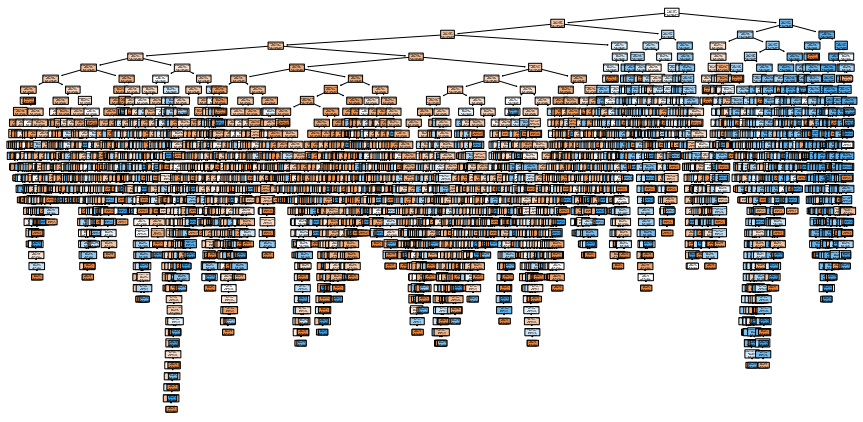

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["No Impago", "Impago"], 
          feature_names=X.columns); 
plt.savefig('Tree_Optimized.png', format='png',dpi=1000)

Como puede observarse, el árbol podado tiene menos ramas que el árbol anteriormente creado (sin podar).

In [ ]:
# Calculando predicciones en las pruebas
predictions = clf_dt_pruned.predict(X_test)

#Calculando la matriz de confusión
matriz = confusion_matrix(Y_test,predictions, labels=classifier.classes_)

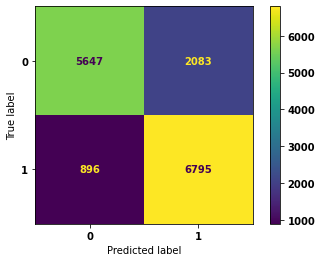

In [ ]:
#Graficando la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      7730
           1       0.77      0.88      0.82      7691

    accuracy                           0.81     15421
   macro avg       0.81      0.81      0.81     15421
weighted avg       0.81      0.81      0.81     15421



In [ ]:
# Calculando predicciones en las pruebas
predictions_train = clf_dt_pruned.predict(X_train)

print(classification_report(Y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     15634
           1       0.88      0.95      0.92     15673

    accuracy                           0.91     31307
   macro avg       0.91      0.91      0.91     31307
weighted avg       0.91      0.91      0.91     31307



El árbol encontrado, aunque tiene una exhaustividad menor con los datos de prueba comparado con el árbol sin podar (88% vs 95%) para el caso positivo de impago, no tiene una exhaustividad perfecta con los datos de entrenamiento y sus exactitudes no son tan dispares (81% vs 91%), por lo que se concluye que este árbol no está sobreajustado y pudiera tener un mejor desempeño ante nuevos datos.

###**8.2 Árbol de Decisión - Con Edad (recall 95%)**

En la Sección 5.1.4 se encontró que la probabilidad de caer en impago aumenta exponencialmente con la edad, por lo que se revisará si al agregar dicha variable se puede mejorar el desempeño del modelo.

Primero se procede a escalar y centrar los datos:

In [ ]:
from sklearn import preprocessing # escala y centra los datos
scaler2 = preprocessing.StandardScaler().fit(X_train_edad)
X_train_edad = scaler2.transform(X_train_edad)
X_test_edad = scaler2.transform(X_test_edad)

In [ ]:
#importando librerías
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [ ]:
#creando el clasificador
#classifier = DecisionTreeClassifier(max_depth=13, random_state=14)
classifier = DecisionTreeClassifier(random_state=14) 
# entrenado el clasificador
classifier.fit(X_train_edad, Y_train)
# Calculando predicciones en las pruebas
predictions_edad = classifier.predict(X_test_edad)

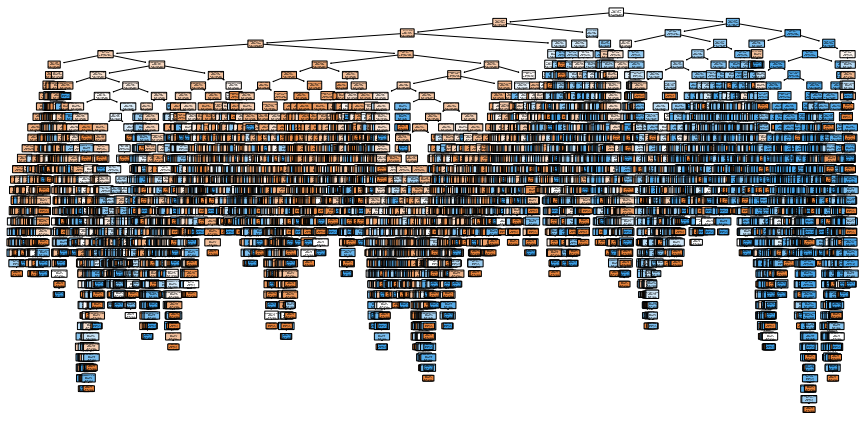

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(classifier, 
          filled=True, 
          rounded=True, 
          class_names=["No Impago", "Impago"], 
          feature_names=X_edad.columns); 
plt.savefig('AgeTree.png', format='png', dpi=1000)

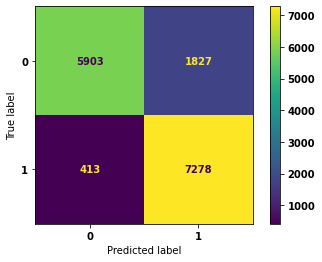

In [ ]:
#Calculando la matriz de confusión
matriz = confusion_matrix(Y_test,predictions_edad, labels=classifier.classes_)
#Graficando la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=classifier.classes_)
disp.plot()
plt.show()


In [ ]:
print(classification_report(Y_test, predictions_edad))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      7730
           1       0.80      0.95      0.87      7691

    accuracy                           0.85     15421
   macro avg       0.87      0.85      0.85     15421
weighted avg       0.87      0.85      0.85     15421



Ahora comparemos su desempeño contra el dataset de entrenamiento

In [ ]:
# Calculando predicciones en las pruebas
predictions_train_edad = classifier.predict(X_train_edad)

print(classification_report(Y_train, predictions_train_edad))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15634
           1       0.99      1.00      0.99     15673

    accuracy                           0.99     31307
   macro avg       0.99      0.99      0.99     31307
weighted avg       0.99      0.99      0.99     31307



Aunque el árbol de decisión creado tiene una muy buena exhaustividad para predecir impagos (95%) el modelo da la impresión de estar sobreajustado, ya que su desempeño con el dataset de entrenamiento es de 100%

###**8.2.1 Poda del Árbol con Edad  (Ajuste de Hiperparámetros - recall 84%)**

In [ ]:
path = classifier.cost_complexity_pruning_path(X_train_edad, Y_train) # determina los valores para alpha
ccp_alphas1 = path.ccp_alphas # extrae los diferentes valores para alpha
ccp_alphas1 = ccp_alphas1[:-1] # excluye el valor máximo para alpha

clf_dts = [] # crea el arreglo donde almacenaremos los árboles de decisión

ccp_alphas1

## se crea un árbol de decisión para cada valor alpha y lo guardamos en el arreglo
for ccp_alpha1 in ccp_alphas1:
    if ccp_alpha1 < 0:
      ccp_alpha1=0
    clf_dt = DecisionTreeClassifier(random_state=14, ccp_alpha=ccp_alpha1)
    clf_dt.fit(X_train_edad, Y_train)
    clf_dts.append(clf_dt)

Ahora se graficará la exactitud de los árboles usando el dataset de entrenamiento y el dataset de prueba como una función de alpha.

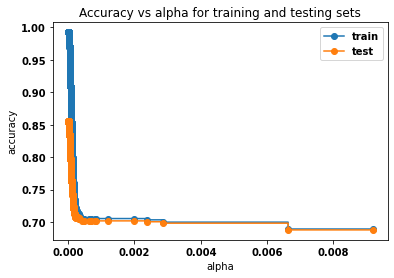

In [ ]:
train_scores = [clf_dt.score(X_train_edad, Y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test_edad, Y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas1, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas1, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Un acercamiento:

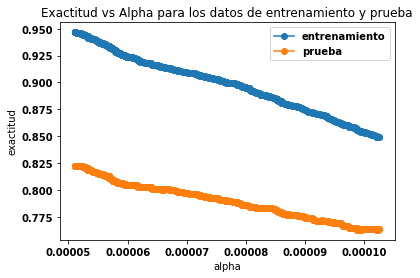

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("exactitud")
ax.set_title("Exactitud vs Alpha para los datos de entrenamiento y prueba")
ax.plot(ccp_alphas1[1000:2000], train_scores[1000:2000], marker='o', label="entrenamiento", drawstyle="steps-post")
ax.plot(ccp_alphas1[1000:2000], test_scores[1000:2000], marker='o', label="prueba", drawstyle="steps-post")
ax.legend()
plt.show()

Se decide que con un alpha de 0.000085 se tiene una exactitud alrededor del 80% en ambos datasets (el de entrenamiento y el de prueba). Esta exactitud similar asegura que no se tenga un sobreajuste con el daset de entrenamiento. 

Se procede a crear el árbol de decisión podado con un alpha =0.000085

In [ ]:
#asignando el alpha optimizado
opt_ccp_alpha = 0.000085

#creando el clasificador
clf_dt_pruned = DecisionTreeClassifier(random_state=14,ccp_alpha=opt_ccp_alpha) 
# entrenado el clasificador
clf_dt_pruned.fit(X_train_edad, Y_train)

DecisionTreeClassifier(ccp_alpha=8.5e-05, random_state=14)

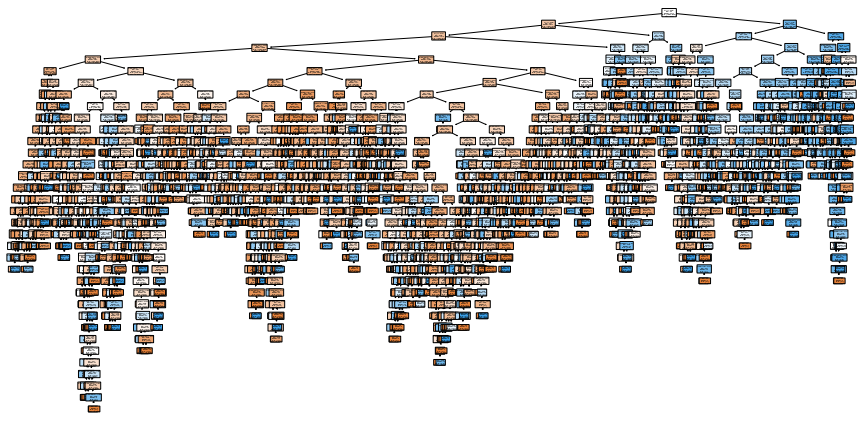

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["No Impago", "Impago"], 
          feature_names=X_edad.columns); 
plt.savefig('Tree_Optimized_Edad.png', format='png',dpi=1000)

In [ ]:
# Calculando predicciones en las pruebas
predictions = clf_dt_pruned.predict(X_test_edad)

#Calculando la matriz de confusión
matriz = confusion_matrix(Y_test,predictions, labels=classifier.classes_)

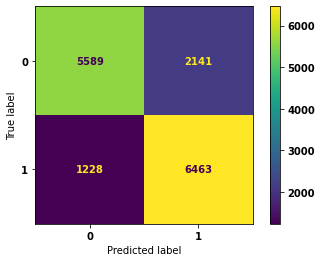

In [ ]:
#Graficando la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      7730
           1       0.75      0.84      0.79      7691

    accuracy                           0.78     15421
   macro avg       0.79      0.78      0.78     15421
weighted avg       0.79      0.78      0.78     15421



In [ ]:
# Calculando predicciones en las pruebas
predictions_train = clf_dt_pruned.predict(X_train_edad)

print(classification_report(Y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     15634
           1       0.86      0.92      0.89     15673

    accuracy                           0.89     31307
   macro avg       0.89      0.89      0.89     31307
weighted avg       0.89      0.89      0.89     31307



El árbol encontrado, aunque tiene una exhaustividad menor con los datos de prueba comparado con el árbol sin podar (84% vs 95%) para el caso positivo de impago, no tiene una exhaustividad perfecta con los datos de entrenamiento y sus exactitudes no son tan diferentes (78% vs 89%), por lo que se concluye que este árbol no está sobreajustado y , por lo tanto, pudiera tener un mejor desempeño ante nuevos datos.

###**8.3 Comparación de árbol con edad y sin edad**

Al comparar la exhaustividad obtenida del árbol podado sin la variable edad (88%) con la obtenida del árbol podado que incluye la variable edad (84%), se concluye que la variable edad no tiene una influencia fuerte en el resultado (clasificación como pago o impago). Esto concuerda con los resultados obtenidos a través de los métodos wrapping y estadísticos para la selección de variables a incluir en el modelo.

Del mismo modo, el árbol de decisión va seleccionando las variables que tienen más influencia para la clasificación de los resultados.  En la figura siguiente se muestran los primeros nodos del árbol podado que toma en cuenta la variable edad y se observa que el comportamiento de pagos (PAY, PercofDeb) tiene un peso mucho mayor que las variables demográficas (AGE, SEX, etc), ya que PAY y PercofDebt aparecen en los primeros nodos. 

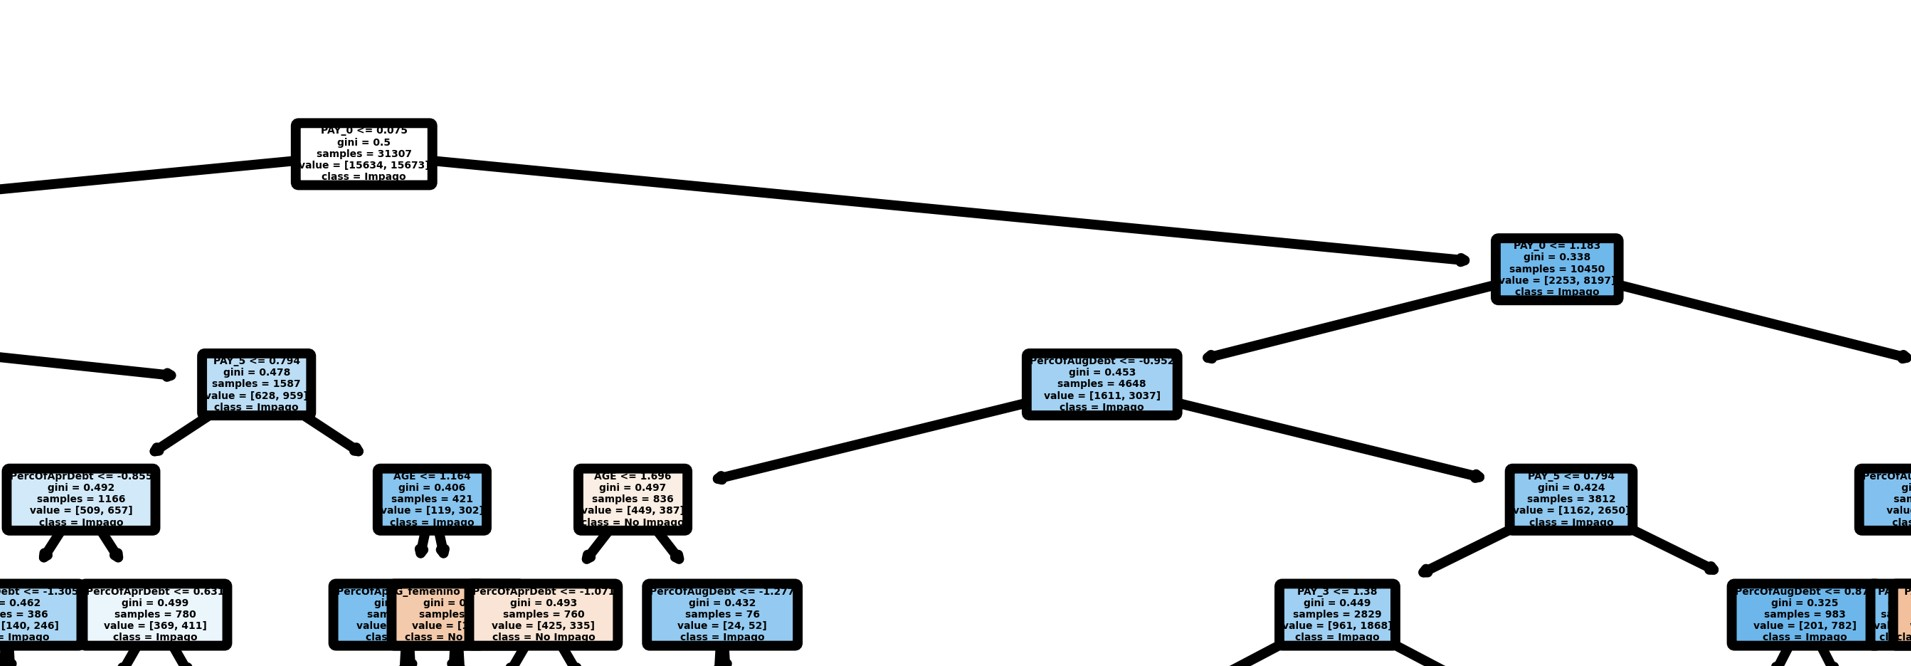

###**8.4 Random Forest**



Random Forest es un conjunto de árboles de decisión combinados con bagging. Al usar bagging, lo que en realidad está pasando, es que distintos árboles ven distintas porciones de los datos. Ningún árbol ve todos los datos de entrenamiento. Esto hace que cada árbol se entrene con distintas muestras de datos para un mismo problema. De esta forma, al combinar sus resultados, unos errores se compensan con otros y tenemos una predicción que generaliza mejor.

Al usar bagging, se combinan varios modelos de machine learning. A diferencia del voto por mayoría, la forma de conseguir que los errores se compensen entre sí, es que cada modelo se entrena con subconjuntos del conjunto de entrenamiento. Estos subconjuntos se forman eligiendo muestras aleatoriamente (con repetición) del conjunto de entrenamiento.

###**8.4.1 Random Forest - Primera aproximación (recall 95%)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
#creando el clasificador
#classifierRF = RandomForestClassifier(n_estimators= 8, random_state= 14, max_depth=13)
classifierRF = RandomForestClassifier(random_state= 14) 
# entrenado el clasificador
classifierRF.fit(X_train, Y_train)
# Calculando predicciones en las pruebas
predictionsRF = classifierRF.predict(X_test)
# Vemos las exactitud del modelo
#Exactitud = accuracy_score(y_true = Y_test, y_pred = predictions)
# Vemos el f1 score del modelo
#F1 = f1_score(y_true = Y_test, y_pred = predictions)
#print('Exactitud = %.4f' % (Exactitud))
#print('F1 = %.4f' % (F1))

In [ ]:
#Calculando la matriz de confusión Radom Forest
matrizRF = confusion_matrix(Y_test,predictionsRF, labels=classifierRF.classes_)


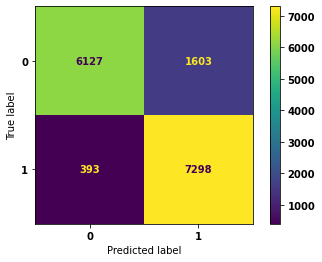

In [ ]:
#Graficando la matriz de confusión Radom Forest
disp = ConfusionMatrixDisplay(confusion_matrix=matrizRF,display_labels=classifierRF.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, predictionsRF))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7730
           1       0.82      0.95      0.88      7691

    accuracy                           0.87     15421
   macro avg       0.88      0.87      0.87     15421
weighted avg       0.88      0.87      0.87     15421



In [ ]:
predictionsRF_train = classifierRF.predict(X_train)
print(classification_report(Y_train, predictionsRF_train))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15634
           1       0.97      1.00      0.98     15673

    accuracy                           0.98     31307
   macro avg       0.98      0.98      0.98     31307
weighted avg       0.98      0.98      0.98     31307



Aunque el bosque aleatorio creado tiene una muy buena exhaustividad para predecir impagos (95%) se presume que está sobreajustado, ya que su desempeño con el dataset de entrenamiento es de 100%

###**8.4.2 Random Forest - Ajuste de Hiperparámetros (RandomizedSearchCV) (recall 89%)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
rfcrs=RandomForestClassifier(random_state=14)

In [ ]:
param_distributions = { 
    'n_estimators': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,20,30,37], #Del árbol podado sin edad se toma la profundidad máxima de 37 para evitar sobreajustes por profundidad
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfcrs = RandomizedSearchCV(estimator=rfcrs, param_distributions=param_distributions, cv= 10, n_iter=5, n_jobs=-1, random_state=14, scoring='recall',)
CV_rfcrs.fit(X_train, Y_train)
CV_rfcrs.best_params_

{'n_estimators': 4,
 'max_features': 'log2',
 'max_depth': 37,
 'criterion': 'entropy'}

In [ ]:
rfc2=RandomForestClassifier(random_state=14, max_features='log2', n_estimators= 4, max_depth=37, criterion='entropy')

In [ ]:
rfc2.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=37, max_features='log2',
                       n_estimators=4, random_state=14)

In [ ]:
# Calculando predicciones en las pruebas
predictionsRFRS = rfc2.predict(X_test)

In [ ]:
#Calculando la matriz de confusión Radom Forest
matrizRFRS = confusion_matrix(Y_test,predictionsRFRS, labels=rfc2.classes_)

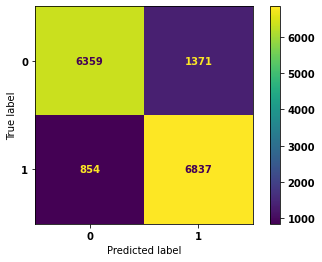

In [ ]:
#Graficando la matriz de confusión Radom Forest
disp2 = ConfusionMatrixDisplay(confusion_matrix=matrizRFRS,display_labels=rfc2.classes_)
disp2.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, predictionsRFRS))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      7730
           1       0.83      0.89      0.86      7691

    accuracy                           0.86     15421
   macro avg       0.86      0.86      0.86     15421
weighted avg       0.86      0.86      0.86     15421



In [ ]:
predictionsRFRS_train = rfc2.predict(X_train)
print(classification_report(Y_train, predictionsRFRS_train))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     15634
           1       0.96      0.97      0.97     15673

    accuracy                           0.97     31307
   macro avg       0.97      0.97      0.97     31307
weighted avg       0.97      0.97      0.97     31307



###**8.4.3 Random Forest - Ajuste de Hiperparámetros (GridSearchCV) (recall 88%)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc=RandomForestClassifier(random_state=14)

In [ ]:
param_grid = { 
    'n_estimators': [2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [20,30,37],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10, scoring='recall')
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=14),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 37],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [2, 4]},
             scoring='recall')

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 4}

In [ ]:
rfc1=RandomForestClassifier(random_state=14, max_features='auto', n_estimators= 4, max_depth=30, criterion='entropy')

In [ ]:
rfc1.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=4,
                       random_state=14)

In [ ]:
# Calculando predicciones en las pruebas
predictionsRFH = rfc1.predict(X_test)

In [ ]:
#Calculando la matriz de confusión Radom Forest
matrizRFH = confusion_matrix(Y_test,predictionsRFH, labels=rfc1.classes_)

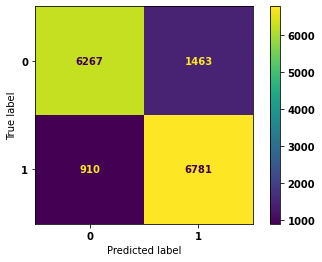

In [ ]:
#Graficando la matriz de confusión Radom Forest
disp = ConfusionMatrixDisplay(confusion_matrix=matrizRFH,display_labels=rfc1.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, predictionsRFH))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      7730
           1       0.82      0.88      0.85      7691

    accuracy                           0.85     15421
   macro avg       0.85      0.85      0.85     15421
weighted avg       0.85      0.85      0.85     15421



In [ ]:
predictionsRFH_train = rfc1.predict(X_train)
print(classification_report(Y_train, predictionsRFH_train))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     15634
           1       0.96      0.97      0.96     15673

    accuracy                           0.96     31307
   macro avg       0.96      0.96      0.96     31307
weighted avg       0.96      0.96      0.96     31307



El bosque aleatorio encontrado, aunque tiene una exhaustividad menor con los datos de prueba, comparado con el bosque sin ajuste de hiperparámetros (88% vs 95%) para el caso positivo de impago, no tiene una exhaustividad perfecta con los datos de entrenamiento y sus exactitudes no son tan diferentes (85% vs 96%), por lo que se concluye que este árbol no está sobreajustado y pudiera tener un mejor desempeño ante nuevos datos.

###**8.4.4 Random Forest - Comparación**

En esta sección se compararán los resultados obtenidos en las Secciones 8.4.1, 8.4.2 y 8.4.3.

En la Sección 8.4.1 se realizó la primera aproximación a un random forest, se dejaron los hiperparámetros establecidos por defecto por el algoritmo con la finalidad de obtener un primer resultado preliminar.  En la Sección 8.4.2, con ayuda de la función `RandomizedSearchCV` se evaluó, a través de validación cruzada, un rango de valores para diferentes hiperparámetros, con el objetivo de ayudar en la búsqueda de los hiperparámetros óptimos para el problema en cuestión.  Una vez teniendo una idea de por dónde están los hiperparámetros óptimos, en la Sección 8.4.3 se procedió a hacer una busqueda más exhaustiva de los mismos, también evaluándolos a través de validación cruzada, pero esta vez con un rango de hiperparámetros más limitado usando la función `GridSearchCV`.

Se puede observar que la exhaustividad obtenida en la Sección 8.4.1 pasó de un 95% a un 89% obtenido en la Sección 8.4.2, ya que los hiperparámetros fueron ajustados con ayuda de la función `RandomizedSearchCV`con la finalidad de obtener un modelo no sobreajustado.  Del mismo modo, se puede observar que esta exhaustividad practicamente no cambió al intentar hacer una búsqueda más refinada con ayuda de la función `GridSearchCV` (Sección 8.4.3). De lo anterior, se concluye que una búsqueda aleatoria (`RandomizedSearchCV`), dependiendo del número de muestras que tome, puede ayudar bastante a encontrar hiperparámetros mejorados con un costo computacional menor comparado con el requerido por `GridSearchCV`. Además, los hiperparámetros óptimos encontrados con `GridSearchCV`, no necesariamente representarán una mejora sustancial, por lo que la potencial mejora obtenida por `GridSearchCV`, no siempre pudiera compensar el costo computacional adicional requerido por éste.   

###**8.5 Support Vector Machine con Análisis de Componentes Principales (recall 54%)**

Para realizar un análisis de componentes principales o PCA, por sus siglas en inglés, es necesario tener los datos centrados y en la misma escala, por lo que éste será el primer paso a realizar. 

El centrar los datos significa hacer que su media sea igual a cero y escalado quiere decir dividir los datos entre su desviación estándar.  Notar que el escalado de datos se realiza después de haber dividido los datos para prueba y entrenamiento para evitar fuga de datos.  La **fuga de datos** ocurre cuando la información acerca del dataset para entrenamiento corrompe o influye en el dataset de prueba.

In [ ]:
from sklearn import preprocessing # escala y centra los datos
from sklearn.decomposition import PCA # realiza análisis de componentes principales
from sklearn.model_selection import GridSearchCV # optimización de parámetros y validación cruzada
from sklearn.svm import SVC # Support vector machine para la clasificación
from sklearn.metrics import confusion_matrix # crea la matriz de confusión
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

In [ ]:

scaler = preprocessing.StandardScaler().fit(X_train_edad)
X_train_scaled = scaler.transform(X_train_edad)
X_test_scaled = scaler.transform(X_test_edad)

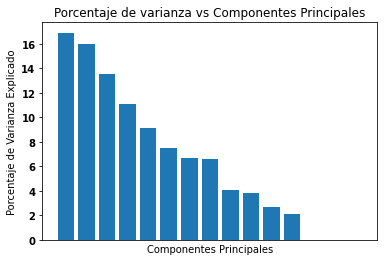

In [ ]:
pca = PCA() # NOTA: Por default, PCA() centra los datos, pero no los escala.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Porcentaje de Varianza Explicado')
plt.xlabel('Componentes Principales')
plt.title('Porcentaje de varianza vs Componentes Principales')
plt.show()

Después de haber descartado varias variables de entrada (columnas) en la sección 6, nos quedamos con 15, incluyendo la edad, como se muestra a continuación:



In [ ]:
X_test_edad.columns

Index(['AGE', 'PAY_0', 'PAY_3', 'PAY_5', 'PercOfAprDebt', 'PercOfAugDebt',
       'G_femenino', 'G_masculino', 'E_otros', 'E_posgrado', 'E_preparatoria',
       'E_universidad', 'EC_casado', 'EC_otros', 'EC_soltero'],
      dtype='object')

De la gráfica anterior, se puede observar que esas 15 variables el PCA las redujo a 12 (contamos 12 barras). También se observa que el componente principal 1 (PC1) es responsable de alrededor del 17% de la variación, seguido por el PC2 al cual se le puede atribuir alrededor del 16%, el PC3 alrededor del 14%, el PC4 alrededor del 11% y así sucesivamente.

Dado que la reducción de variables no fue sustancial (de 15 a 12), se decidió ocupar únicamente los componentes principales que tuvieran un efecto en la variabilidad mayor o igual al 10%.  Por lo tanto, para el entrenamiento del SVM, únicamente se toma el PC1, PC2, PC3 y PC4.

In [ ]:
train_pc1_coords = X_train_pca[:, 0] 
train_pc2_coords = X_train_pca[:, 1]
train_pc3_coords = X_train_pca[:, 2]
train_pc4_coords = X_train_pca[:, 3]

## NOTE:
## pc1 contains the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

## Now center and scale the PCs...
pca_train_scaled = preprocessing.scale(np.column_stack((train_pc1_coords, train_pc2_coords,train_pc3_coords,train_pc4_coords)))

Se procede a buscar los mejores parámetros disponibles con el dataset de entrenamiento.

In [ ]:
param_grid = [
  {'C': [100, 1000], 
   'gamma': ['scale', 1, 0.1, 0.01], 
   'kernel': ['rbf']},
]

#optimal_params = GridSearchCV(
#        SVC(), 
#        param_grid,
#        cv=5,
#        scoring='accuracy', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
#        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
#    )

#optimal_params.fit(pca_train_scaled, Y_train)
#print(optimal_params.best_params_)

In [ ]:
optimal_params = RandomizedSearchCV(
         SVC(), 
         param_grid,
         n_iter = 10,
         scoring='recall',
         n_jobs=-1,
         cv=5,
         verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
         random_state=14
)

optimal_params.fit(pca_train_scaled, Y_train)
print(optimal_params.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'kernel': 'rbf', 'gamma': 1, 'C': 100}


A continuación se procede a entrenar el modelo con los parámetros optimizados obtenidos.  El parámetro de regularización `C`  = 100, `gamma` = 1 y el `kernel` = rbf (radial basis function). 

In [ ]:
clf_svm = SVC(random_state=42, C=100, gamma=1, kernel='rbf')
clf_svm.fit(pca_train_scaled, Y_train)

SVC(C=100, gamma=1, random_state=42)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


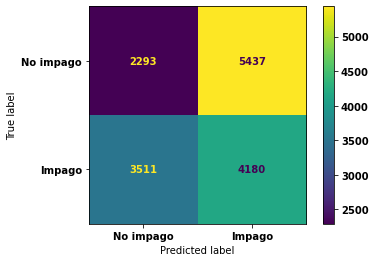

In [ ]:
X_test_pca = pca.fit_transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]
test_pc3_coords = X_test_pca[:, 2]
test_pc4_coords = X_test_pca[:, 3]

## NOTE:
## pc1 contains the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

## Now center and scale the PCs...
pca_test_scaled = preprocessing.scale(np.column_stack((test_pc1_coords, test_pc2_coords,test_pc3_coords,test_pc4_coords)))

plot_confusion_matrix(clf_svm, 
                      pca_test_scaled, 
                      Y_test,
                      values_format='d',
                      display_labels=["No impago", "Impago"])

Podemos observar del reporte de clasificación que el porcentaje de predicciones correctas (precisión) para el caso positivo de impago (1) es de 43 por ciento [4,180/(4,180+5,437)*100 = 43%]

Del mismo modo se observa que el modelo fue capaz de detectar un 54 por ciento de los casos positivos, es decir que cayó en impago (recall) [4,180/(4,180+3,511)*100 = 54%].



In [ ]:
predictionsSVM = clf_svm.predict(pca_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictionsSVM))

              precision    recall  f1-score   support

           0       0.40      0.30      0.34      7730
           1       0.43      0.54      0.48      7691

    accuracy                           0.42     15421
   macro avg       0.41      0.42      0.41     15421
weighted avg       0.41      0.42      0.41     15421



Del reporte de clasificación, se visualiza un soporte (número de ocurrencias de las clases) balanceado. La clase 1 (caso positivo de impago) tiene 7,691 ocurrencias, mientras que la clase 0 (caso negativo de impago) tiene 7,730.

Ahora se procede a visualizar el desempeño con los datos de entrenamiento

In [ ]:
predictionsSVM_train = clf_svm.predict(pca_train_scaled)
print(classification_report(Y_train, predictionsSVM_train))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73     15634
           1       0.76      0.62      0.68     15673

    accuracy                           0.71     31307
   macro avg       0.72      0.71      0.71     31307
weighted avg       0.72      0.71      0.71     31307



Con los datos de entrenamiento, tomando como referencia la exhaustividad para el caso positivo de impago, el desempeño mejora sólo un poco (de 54% a 62%).  Dado que el desempeño es relativamente pobre en ambos casos, se concluye que el modelo está subajustado.

Este subajuste se atribuye a que los componentes principales utilizados para el entrenamiento del modelo, en su conjunto sólo son responsables de alrededor de un 58% de la variabilidad (PC1 17% + PC2 16% + PC3 14% + PC4 11%).  Es decir, en este dataset no hay componentes principales que tengan un peso mucho mayor en comparación de otros con los cuáles se pueda explicar un 80% o más de la variabilidad.  

Para conocer las variables con más influencia sobre la Componente Principal 1 (responsable de la mayor variación), procedemos a obtener la relación de las variables de entrada con dicha Componente Principal.

In [ ]:
# Dump components relations with features:
PC_df = pd.DataFrame(pca.components_,columns=X_test_edad.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9', 'PC-10', 'PC-11', 'PC-12', 'PC-13', 'PC-14', 'PC-15'])
print(PC_df[0:1])

           AGE     PAY_0     PAY_3     PAY_5  PercOfAprDebt  PercOfAugDebt  \
PC-1 -0.156484 -0.376371 -0.399839 -0.365944      -0.373131      -0.330039   

      G_femenino  G_masculino  E_otros  E_posgrado  E_preparatoria  \
PC-1    0.149099    -0.149099  0.02927    0.298064        -0.12712   

      E_universidad  EC_casado  EC_otros  EC_soltero  
PC-1      -0.192278  -0.223945 -0.032998     0.23106  


In [ ]:
X_PC1 = X_test_edad.columns.to_numpy()
print (X_PC1)

['AGE' 'PAY_0' 'PAY_3' 'PAY_5' 'PercOfAprDebt' 'PercOfAugDebt'
 'G_femenino' 'G_masculino' 'E_otros' 'E_posgrado' 'E_preparatoria'
 'E_universidad' 'EC_casado' 'EC_otros' 'EC_soltero']


Para fines comparativos nos enfocaremos en su valor absoluto

In [ ]:
Y_PC1 = abs(PC_df[0:1].to_numpy()) #convertimos del tipo dataframe al tipo arreglo para poder graficar
print (Y_PC1)



[[0.15648409 0.37637111 0.39983944 0.36594365 0.37313051 0.33003939
  0.14909914 0.14909914 0.02926988 0.29806397 0.12711977 0.19227806
  0.22394455 0.03299789 0.23105961]]


Para visualizar de mejor manera las relaciones, crearemos una gráfica de las mismas.

In [ ]:
Y_PC1 = np.reshape(Y_PC1,[15,]) #convertimos el arreglo multidimensional a un arreglo de una sola dimensión para poder graficar
print (Y_PC1)

[0.15648409 0.37637111 0.39983944 0.36594365 0.37313051 0.33003939
 0.14909914 0.14909914 0.02926988 0.29806397 0.12711977 0.19227806
 0.22394455 0.03299789 0.23105961]


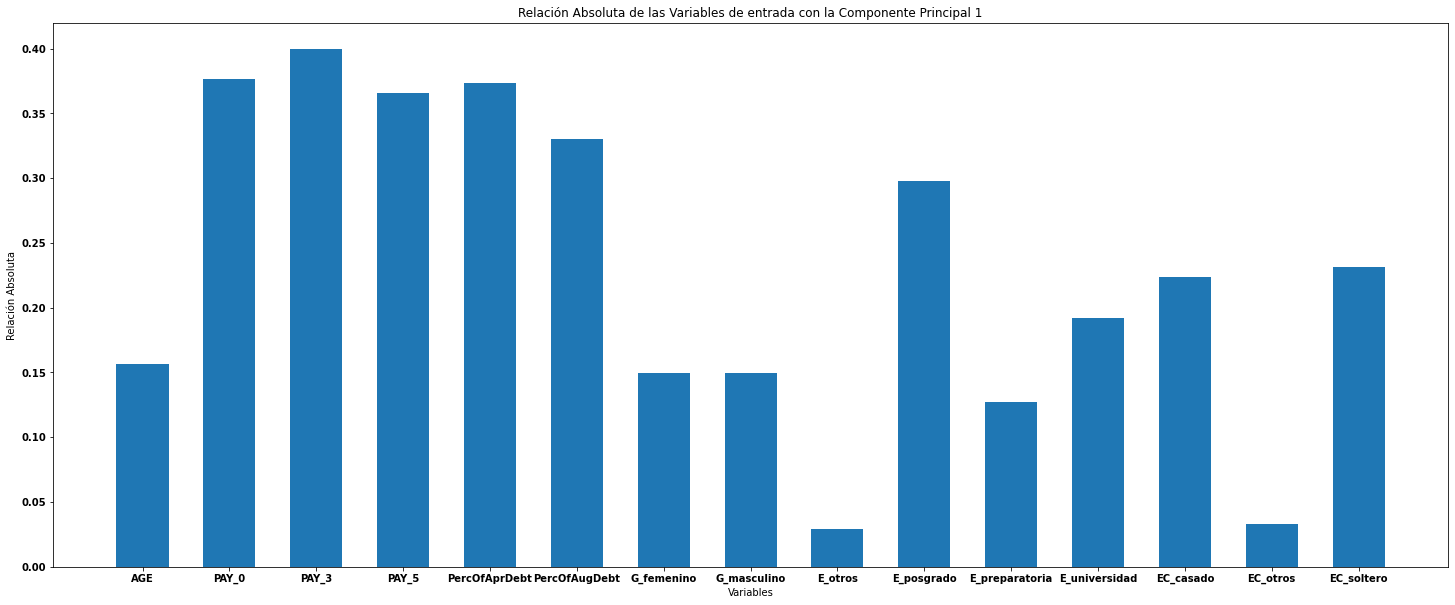

In [ ]:
fig = plt.figure(figsize = (25, 10))
 
# creating the bar plot
plt.bar(X_PC1, Y_PC1, width = 0.6)
 
plt.xlabel("Variables")
plt.ylabel("Relación Absoluta")
plt.title("Relación Absoluta de las Variables de entrada con la Componente Principal 1")
plt.show()

En la gráfica anterior puede apreciarse que las variables con mayor influencia son las relacionadas al comportamiento de pago (PAY, PercOfDebt) y no a las variables demográficas como nivel de estudio, estado civil, edad, etc.

## **9. Conclusiones**

1. Como se demostró en la Sección 8.3 y al final de la Sección 8.5, las variables históricas y financieras tienen una mayor influencia sobre la salida (condición de pago o impago) que las variables demográficas.  Es decir, que el comportamiento de los clientes respecto a qué tanto se endeudan y qué tan bien han pagado sus deudas a través del tiempo es un mejor predictor que las variables demográficas respecto a si caerán o no en una condición de impago.   

2. Al balancear (oversampling) la variable de salida para obtener un número similar en las instancias tanto positivas como negativas de impago, se observó una mejora tanto en el recall como en la precisión de los casos positivos.

3. Se logró obtener un buen modelo predictivo a través de un árbol de decisión podado, con una exhaustividad (recall) del 84%.  

4. Dicho modelo se pudo mejorar al usar un bosque en lugar de un sólo árbol.  Con un bosque la exhaustividad logro aumentarse del 84% al 88%.

5. El modelo creado usando Support Vector Machine con Análisis de Componentes Principales no resultó ser muy útil para este problema. Esto es debido a que la variabilidad no se concentra sólo en algunos de los Componentes Principales encontrados, sino que se distribuye en varios de ellos, por lo que la reducción de dimensionalidad compromete bastante el desempeño del modelo.

6. Support Vector Machine con Análisis de Componentes Principales fue el modelo que más recursos computacionales requirió, pero que, a la vez, el que demostró el menor desempeño.  Por lo que queda demostrado una vez más que un mayor gasto computacional no necesariamente se va a traducir en un mejor desempeño.

7. Si se deseará mandar a producción este proyecto, el modelo seleccionado sería el obtenido a través de Random Forest, el cual demostró un mejor desempeño en la exhaustividad para el caso de impago.  De acuerdo a los datos obtenidos, este modelo sería capaz de predecir el 88% de los casos que caerán en impago.

## **10. Futuras Posibles Mejoras**

Se decidió no utilizar las primeras aproximaciones tanto del Árbol de Decisión como del Random Forest ya que ambas muestran una exhaustividad (recall) del 100% con los datos de entrenamiento para el caso positivo de impago, lo cual puede interpretarse como que dichos modelos están sobreajustados.  

Sin embargo, al seleccionar una medida de desempeño un poco más genérica como lo es la exactitud (accuracy), dicha medida muestra un 98% con los datos de entrenamiento y un 87% con los datos de prueba.  Se considera que el modelo está sobreajustado cuando se obtiene un muy buen desempeño con los datos de entrenamiento, pero presenta un desempeño pobre con los datos nuevos o de prueba.  Este 87%, aunque es un poco menor que el 98%, realmente no es un desempeño pobre.  Por lo tanto, sería bueno evaluar los modelos obtenidos en las primeras aproximaciones con más datos nuevos conforme se vayan recopilando antes de descartarlos por completo.  Estos modelos, en teoría, tienen un mejor desempeño que los modelos obtenidos ajustando los hiperparámetros y sería bueno evaluarlos de manera más exhaustiva con más datos nuevos antes de desecharlos.      